# Import

In [1]:
!conda install pytorch torchvision torchaudio cudatoolkit=11.6 -c pytorch -c conda-forge

/ 

In [1]:
import torch

In [1]:
from time import time 
import os
import re
import pandas as pd
import numpy as np
import spacy
import multiprocessing

from gensim.models.phrases import Phrases, Phraser
from gensim.models import Word2Vec

import bokeh.plotting as bp
from bokeh.models import HoverTool, BoxSelectTool
from bokeh.plotting import figure, show, output_notebook

from sklearn.metrics import confusion_matrix
from sklearn.manifold import TSNE
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import scale
from sklearn.feature_extraction.text import TfidfVectorizer

import keras 
from keras.models import Sequential, Model 
from keras import layers
from keras.layers import Dense, Conv1D, MaxPooling1D, Flatten, Dropout, Input, Embedding
from keras.layers.merging import Concatenate

from wordcloud import WordCloud
from nltk.tokenize import RegexpTokenizer

ModuleNotFoundError: No module named 'spacy'

In [3]:
pd.set_option('display.width', 50)
pd.set_option('max_colwidth', 10000)
pd.set_option('display.expand_frame_repr' , False)

# Load Data

In [ ]:
NM = list( map( int, input().split() ) ) 
N = NM[0]
M = NM[1]
t = list( map( int, input().split() ) )
structura = []
for i in range(M):
  AB = list( map( int, input().split() ) ) 
  structura.append(AB)

all_elements = []
for i in structura:
  for j in i:
    all_elements.append(j)

elements = list(set(all_elements))

dicts = {}

first_line = []
for k in range(len(structura)):
  first = structura[k][0]
  first_line.append(first)

element_info = [] 
road1 = []
road = []
dobav = []
for element in range(len(elements)):
  if elements[element] in first_line:
    element_info.append(t[element])
    road1 = []
    element_info.append(road1)
    dicts[elements[element]] = element_info
    element_info = []  
  else:

    for uroven in range(1, M):
      for i in range(len(structura)):
       j = structura[i][uroven]
       if j not in dobav:
         for i1 in range(len(structura)):
           if structura[i1][uroven] == j:
             road.append(structura[i1])
         dobav.append(j)    
     

    element_info.append(t[element])
    element_info.append(road)
    dicts[elements[element]] = element_info

    element_info = []  
    road = []  

timing = []
for i in elements:
  time_i_list = []
  if i in first_line:
    timing.append(t[elements.index(i)])
  else:
    for j in dicts[i][1]:
    
      time_i=0
      for j1 in j[:-1]:
        time_i += t[t.index(j1)]
      time_i_list.append(time_i)

    timing.append(t[elements.index(i)] + max(time_i_list))

vremena = ''
for taim in timing:
  vremena+=str(taim) + ' '
print(vremena)

Без запятой введите N - количество модулей и M - количество связей в DAG’е : 3 2
Без запятой введите время выполнения каждого модулея : 1 2 10
Без запятой введите последовательность из номеров связанных модулей в DAG’е : 1 3
Без запятой введите последовательность из номеров связанных модулей в DAG’е : 2 3
1 2 12 


In [ ]:
import requests, re, urllib
r = requests.get('https://habr.com/ru/')
urls = re.findall(r'(?<=href=[\"\'])[^./#\'\"].*?(?=[\"\'])', r.text)

for url in urls:
  res = urllib.parse.urlparse(url)
  print(res.netloc or res.path)

assets.habr.com
assets.habr.com
assets.habr.com
assets.habr.com
assets.habr.com
assets.habr.com
assets.habr.com
assets.habr.com
assets.habr.com
habr.com
habr.com
habr.com
habr.com
assets.habr.com
assets.habr.com
assets.habr.com
assets.habr.com
assets.habr.com
assets.habr.com
assets.habr.com
assets.habr.com
assets.habr.com
assets.habr.com
assets.habr.com
assets.habr.com
assets.habr.com
assets.habr.com
assets.habr.com
assets.habr.com
assets.habr.com
assets.habr.com
assets.habr.com
assets.habr.com
assets.habr.com
assets.habr.com
assets.habr.com
assets.habr.com
assets.habr.com
assets.habr.com
assets.habr.com
assets.habr.com
www.facebook.com
twitter.com
vk.com
telegram.me
www.youtube.com
zen.yandex.ru
habr.com
company.habr.com


In [ ]:
ds = pd.read_json('/content/drive/MyDrive/FinalDS/train.jsonl', orient = 'idx', lines = True)
ds

,question,passage,label,idx
0,Вднх - это выставочный центр?,«Вы́ставочный центр» — станция Московского монорельса. Расположена между станциями «Улица Академика Королёва» и «Улица Сергея Эйзенштейна». Находится на территории Останкинского района Северо-Восточного административного округа города Москвы. Переход на станцию ВДНХ Калужско-Рижской линии. Названа в честь Всероссийского выставочного центра — названия ВДНХ с 1992 по 2014 год. 20 ноября 2004 года линия монорельса начала работать в «экскурсионном режиме» и перевезла первых пассажиров .,True,0
1,Вднх - это выставочный центр?,"Вы́ставка достиже́ний наро́дного хозя́йства , в 1959—1991 годах — Вы́ставка достиже́ний наро́дного хозя́йства СССР , в 1992—2014 годах — Всеросси́йский вы́ставочный центр ) — выставочный комплекс в Останкинском районе Северо-Восточного административного округа города Москвы, второй по величине выставочный комплекс в городе. Входит в 50 крупнейших выставочных центров мира. Ежегодно ВДНХ посещают 30 млн гостей. 1 августа 2019 года выставка отпраздновала 80-летний юбилей. Территориально ВДНХ объединена с парком «Останкино» и Главным ботаническим садом , их общая площадь составляет почти 700 га: 240,2 га — площадь ВДНХ, 75,6 га — площадь парка «Останкино», 361 га — площадь ГБС, 9,5 га музейно-выставочный центр «Рабочий и колхозница» и площадь перед аркой Главного входа. На территории Выставки расположено множество шедевров архитектуры — 49 объектов ВДНХ признаны памятниками культурного наследия.",True,1
2,Был ли джиган в black star?,"Вместе с этим треком они выступили на церемонии вручения наград MTV RMA — это был первый выход Джигана на большую сцену. В 2007 году Джиган стал официальным артистом лейбла Black Star Inc., выпустил первый песню и клип «Одноклассница» — совместная работа с Тимати. В марте 2011 года появилась совместная с Юлей Савичевой композиция «Отпусти». Песня поднялась в радиочарте «Tophit» до 8 места и заняла первое место чарта Weekly Audience Choice Top Hit . Количество просмотров клипа на YouTube превысило 17 миллионов.",True,2
3,Xiaomi конкурент apple?,"Xiaomi — китайская компания, основанная в 2010 году и занимающаяся выпуском электроники и бытовой техники, а также разработкой программного обеспечения. Основной продукцией компании являются смартфоны, первый из которых был выпущен в 2011 году. В настоящее время Xiaomi производит широкий ассортимент смартфонов в разных ценовых сегментах и является одним из крупнейших производителей смартфонов в мире. Так, в третьем квартале 2014 года эта компания заняла наивысшее для себя третье место в мире по поставкам смартфонов, набрав 5,2 % в штучном выражении и уступив лишь Samsung и Apple . За весь 2017 год компания заняла по продажам первое место в Китае и второе место в Индии. В данном списке приводятся все смартфоны, когда-либо выпущенные компанией Xiaomi.",True,3
4,Был ли автомат калашникова в вов?,"Отметив некоторые недостатки и в целом удачную конструкцию, специалисты ГАУ не рекомендовали принимать ПП Калашникова на вооружение по технологическим причинам. Заключение гласило: С 1942 года Калашников работал на Центральном научно-исследовательском полигоне стрелкового и миномётного вооружения ГАУ РККА. Здесь в 1944 году он создал опытный образец самозарядного карабина, который, хотя и не вышел в серийное производство, частично послужил прототипом для создания автомата. С 1945 года Михаил Калашников начал разработку автоматического оружия под промежуточный патрон 7,62×39 образца 1943 года. Автомат Калашникова победил в конкурсе 1947 года и был принят на вооружение.",False,4
...,...,...,...,...
1744,Разрешен ли такой вид ловли акул в настоящее время?,"Для человека они потенциально полезны в медицине и применяются в качестве пищи. Исторически вылов акул производился в относительно небольших масштабах и не составлял проблем для восстановления их численности. Однако возросший с 80-х годов XX века промысел поставил под угрозу многие виды[46]. Одна из причин роста популярности акул в качестве объек

In [ ]:
ds['passage'][2]


'Вместе с этим треком они выступили на церемонии вручения наград MTV RMA — это был первый выход Джигана на большую сцену. В 2007 году Джиган стал официальным артистом лейбла Black Star Inc., выпустил первый песню и клип «Одноклассница» — совместная работа с Тимати. В марте 2011 года появилась совместная с Юлей Савичевой композиция «Отпусти». Песня поднялась в радиочарте «Tophit» до 8 места и заняла первое место чарта Weekly Audience Choice Top Hit . Количество просмотров клипа на YouTube превысило 17 миллионов.'

In [ ]:
ds['question'][2]

'Был ли джиган в black star?'

In [ ]:
ds.loc[2, ['question', 'passage' ]]

question                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                            Был ли джиган в black star?
passage     Вместе с этим треком они выступили на церемонии вручения наград MTV RMA — это был первый выход Джигана на большую сцену. В 2007 году Джиган стал официальным артистом лейбла Black Star Inc., выпустил первый песню и клип «Одноклассница» — совместная работа с Тимати. В марте 2011 года появилась совместная с Юлей Савичевой композиция «Отпусти». Песня поднялась в радиочарте «Tophit» до 8 места и заняла первое место чарта Weekly Audience Choice Top Hit . Количес

In [ ]:
ds.loc[(ds.label == True), 'label'] = 1
ds.loc[(ds.label == False), 'label'] = 0

In [ ]:
ds['passage'] = ds['passage'].str.lower()
ds['question'] = ds['question'].str.lower()

In [ ]:
ds

,question,passage,label,idx
0,вднх - это выставочный центр?,«вы́ставочный центр» — станция московского монорельса. расположена между станциями «улица академика королёва» и «улица сергея эйзенштейна». находится на территории останкинского района северо-восточного административного округа города москвы. переход на станцию вднх калужско-рижской линии. названа в честь всероссийского выставочного центра — названия вднх с 1992 по 2014 год. 20 ноября 2004 года линия монорельса начала работать в «экскурсионном режиме» и перевезла первых пассажиров .,1,0
1,вднх - это выставочный центр?,"вы́ставка достиже́ний наро́дного хозя́йства , в 1959—1991 годах — вы́ставка достиже́ний наро́дного хозя́йства ссср , в 1992—2014 годах — всеросси́йский вы́ставочный центр ) — выставочный комплекс в останкинском районе северо-восточного административного округа города москвы, второй по величине выставочный комплекс в городе. входит в 50 крупнейших выставочных центров мира. ежегодно вднх посещают 30 млн гостей. 1 августа 2019 года выставка отпраздновала 80-летний юбилей. территориально вднх объединена с парком «останкино» и главным ботаническим садом , их общая площадь составляет почти 700 га: 240,2 га — площадь вднх, 75,6 га — площадь парка «останкино», 361 га — площадь гбс, 9,5 га музейно-выставочный центр «рабочий и колхозница» и площадь перед аркой главного входа. на территории выставки расположено множество шедевров архитектуры — 49 объектов вднх признаны памятниками культурного наследия.",1,1
2,был ли джиган в black star?,"вместе с этим треком они выступили на церемонии вручения наград mtv rma — это был первый выход джигана на большую сцену. в 2007 году джиган стал официальным артистом лейбла black star inc., выпустил первый песню и клип «одноклассница» — совместная работа с тимати. в марте 2011 года появилась совместная с юлей савичевой композиция «отпусти». песня поднялась в радиочарте «tophit» до 8 места и заняла первое место чарта weekly audience choice top hit . количество просмотров клипа на youtube превысило 17 миллионов.",1,2
3,xiaomi конкурент apple?,"xiaomi — китайская компания, основанная в 2010 году и занимающаяся выпуском электроники и бытовой техники, а также разработкой программного обеспечения. основной продукцией компании являются смартфоны, первый из которых был выпущен в 2011 году. в настоящее время xiaomi производит широкий ассортимент смартфонов в разных ценовых сегментах и является одним из крупнейших производителей смартфонов в мире. так, в третьем квартале 2014 года эта компания заняла наивысшее для себя третье место в мире по поставкам смартфонов, набрав 5,2 % в штучном выражении и уступив лишь samsung и apple . за весь 2017 год компания заняла по продажам первое место в китае и второе место в индии. в данном списке приводятся все смартфоны, когда-либо выпущенные компанией xiaomi.",1,3
4,был ли автомат калашникова в вов?,"отметив некоторые недостатки и в целом удачную конструкцию, специалисты гау не рекомендовали принимать пп калашникова на вооружение по технологическим причинам. заключение гласило: с 1942 года калашников работал на центральном научно-исследовательском полигоне стрелкового и миномётного вооружения гау ркка. здесь в 1944 году он создал опытный образец самозарядного карабина, который, хотя и не вышел в серийное производство, частично послужил прототипом для создания автомата. с 1945 года михаил калашников начал разработку автоматического оружия под промежуточный патрон 7,62×39 образца 1943 года. автомат калашникова победил в конкурсе 1947 года и был принят на вооружение.",0,4
...,...,...,...,...
1744,разрешен ли такой вид ловли акул в настоящее время?,"для человека они потенциально полезны в медицине и применяются в качестве пищи. исторически вылов акул производился в относительно небольших масштабах и не составлял проблем для восстановления их численности. однако возросший с 80-х годов xx века промысел поставил под угрозу многие виды[46]. одна из причин роста популярности акул в качестве объекта промысла — эт

In [ ]:
import string

In [ ]:
ds['question'] = ds['question'].str.replace('[{}]'.format(string.punctuation), '')
ds['passage'] = ds['passage'].str.replace('[{}]'.format(string.punctuation), '')
ds['passage'] = ds['passage'].str.replace('—', '')
ds['passage'] = ds['passage'].str.replace('»', '')
ds['passage'] = ds['passage'].str.replace('«', '')

In [ ]:
ds

,question,passage,label,idx
0,вднх это выставочный центр,вы́ставочный центр станция московского монорельса расположена между станциями улица академика королёва и улица сергея эйзенштейна находится на территории останкинского района северовосточного административного округа города москвы переход на станцию вднх калужскорижской линии названа в честь всероссийского выставочного центра названия вднх с 1992 по 2014 год 20 ноября 2004 года линия монорельса начала работать в экскурсионном режиме и перевезла первых пассажиров,1,0
1,вднх это выставочный центр,вы́ставка достиже́ний наро́дного хозя́йства в 19591991 годах вы́ставка достиже́ний наро́дного хозя́йства ссср в 19922014 годах всеросси́йский вы́ставочный центр выставочный комплекс в останкинском районе северовосточного административного округа города москвы второй по величине выставочный комплекс в городе входит в 50 крупнейших выставочных центров мира ежегодно вднх посещают 30 млн гостей 1 августа 2019 года выставка отпраздновала 80летний юбилей территориально вднх объединена с парком останкино и главным ботаническим садом их общая площадь составляет почти 700 га 2402 га площадь вднх 756 га площадь парка останкино 361 га площадь гбс 95 га музейновыставочный центр рабочий и колхозница и площадь перед аркой главного входа на территории выставки расположено множество шедевров архитектуры 49 объектов вднх признаны памятниками культурного наследия,1,1
2,был ли джиган в black star,вместе с этим треком они выступили на церемонии вручения наград mtv rma это был первый выход джигана на большую сцену в 2007 году джиган стал официальным артистом лейбла black star inc выпустил первый песню и клип одноклассница совместная работа с тимати в марте 2011 года появилась совместная с юлей савичевой композиция отпусти песня поднялась в радиочарте tophit до 8 места и заняла первое место чарта weekly audience choice top hit количество просмотров клипа на youtube превысило 17 миллионов,1,2
3,xiaomi конкурент apple,xiaomi китайская компания основанная в 2010 году и занимающаяся выпуском электроники и бытовой техники а также разработкой программного обеспечения основной продукцией компании являются смартфоны первый из которых был выпущен в 2011 году в настоящее время xiaomi производит широкий ассортимент смартфонов в разных ценовых сегментах и является одним из крупнейших производителей смартфонов в мире так в третьем квартале 2014 года эта компания заняла наивысшее для себя третье место в мире по поставкам смартфонов набрав 52 в штучном выражении и уступив лишь samsung и apple за весь 2017 год компания заняла по продажам первое место в китае и второе место в индии в данном списке приводятся все смартфоны когдалибо выпущенные компанией xiaomi,1,3
4,был ли автомат калашникова в вов,отметив некоторые недостатки и в целом удачную конструкцию специалисты гау не рекомендовали принимать пп калашникова на вооружение по технологическим причинам заключение гласило с 1942 года калашников работал на центральном научноисследовательском полигоне стрелкового и миномётного вооружения гау ркка здесь в 1944 году он создал опытный образец самозарядного карабина который хотя и не вышел в серийное производство частично послужил прототипом для создания автомата с 1945 года михаил калашников начал разработку автоматического оружия под промежуточный патрон 762×39 образца 1943 года автомат калашникова победил в конкурсе 1947 года и был принят на вооружение,0,4
...,...,...,...,...
1744,разрешен ли такой вид ловли акул в настоящее время,для человека они потенциально полезны в медицине и применяются в качестве пищи исторически вылов акул производился в относительно небольших масштабах и не составлял проблем для восстановления их численности однако возросший с 80х годов xx века промысел поставил под угрозу многие виды46 одна из причин роста популярности акул в качестве объекта промысла это их плавники суп из акульих плавников считается деликатесом и плавник по стоимости выше акульего мяса это привело к негуманному способу охоты з

In [ ]:
ds.to_csv('/content/drive/MyDrive/FinalDS/train.csv')

# Final


In [4]:
ds = pd.read_json('../DaNetQA/test.jsonl', lines=True)

In [7]:
!pip3 install transformers

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 5.3/5.3 MB 9.0 MB/s eta 0:00:0000:0100:01
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 757.0/757.0 kB 10.6 MB/s eta 0:00:0000:0100:01
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 163.5/163.5 kB 10.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 7.6/7.6 MB 11.2 MB/s eta 0:00:0000:0100:01


In [4]:
import random
import torch
import numpy as np
import pandas as pd
from tqdm import tqdm
from torch.utils.data import TensorDataset, DataLoader, RandomSampler, SequentialSampler
from transformers import AutoTokenizer, AutoModelForSequenceClassification, AdamW

In [5]:
# Use a GPU if you have one available (Runtime -> Change runtime type -> GPU)
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")

# Set seeds for reproducibility
random.seed(26)
np.random.seed(26)
torch.manual_seed(26)

tokenizer = AutoTokenizer.from_pretrained('DeepPavlov/rubert-base-cased') #("cointegrated/rubert-tiny") 

model = AutoModelForSequenceClassification.from_pretrained('DeepPavlov/rubert-base-cased')#("cointegrated/rubert-tiny")
model.to(device) 

learning_rate = 1e-5
optimizer = AdamW(model.parameters(), lr=learning_rate, eps=1e-8)

Downloading: 100%|██████████| 24.0/24.0 [00:00<00:00, 27.6kB/s]
Downloading: 100%|██████████| 642/642 [00:00<00:00, 750kB/s]
Downloading: 100%|██████████| 1.65M/1.65M [00:01<00:00, 1.06MB/s]
Downloading: 100%|██████████| 112/112 [00:00<00:00, 145kB/s]
Downloading: 100%|██████████| 714M/714M [01:04<00:00, 11.0MB/s]  
Some weights of the model checkpoint at DeepPavlov/rubert-base-cased were not used when initializing BertForSequenceClassification: ['cls.predictions.decoder.weight', 'cls.seq_relationship.weight', 'cls.seq_relationship.bias', 'cls.predictions.decoder.bias', 'cls.predictions.transform.LayerNorm.weight', 'cls.predictions.transform.LayerNorm.bias', 'cls.predictions.bias', 'cls.predictions.transform.dense.weight', 'cls.predictions.transform.dense.bias']
- This IS expected if you are initializing BertForSequenceClassification from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertFo

In [15]:
def encode_data(tokenizer, questions, passages, max_length):
    """Encode the question/passage pairs into features than can be fed to the model."""
    input_ids = []
    attention_masks = []

    for question, passage in zip(questions, passages):
        encoded_data = tokenizer.encode_plus(question, passage, max_length=max_length, pad_to_max_length=True, truncation_strategy="longest_first")
        encoded_pair = encoded_data["input_ids"]
        attention_mask = encoded_data["attention_mask"]

        input_ids.append(encoded_pair)
        attention_masks.append(attention_mask)

    return np.array(input_ids), np.array(attention_masks)

# Loading data
train_data_ds = pd.read_json('../DaNetQA/train.jsonl', lines=True)
dev_data_ds = pd.read_json('../DaNetQA/val.jsonl', lines=True)

passages_train = train_data_ds.passage[:5].values
questions_train = train_data_ds.question[:5].values
answers_train = train_data_ds.label[:5].values.astype(int)

passages_dev = dev_data_ds.passage[5:].values
questions_dev = dev_data_ds.question[5:].values
answers_dev = dev_data_ds.label.values[5:].astype(int)

# Encoding data
max_seq_length = 350
input_ids_train, attention_masks_train = encode_data(tokenizer, questions_train, passages_train, max_seq_length)
input_ids_dev, attention_masks_dev = encode_data(tokenizer, questions_dev, passages_dev, max_seq_length)

train_features = (input_ids_train, attention_masks_train, answers_train)
dev_features = (input_ids_dev, attention_masks_dev, answers_dev)

Truncation was not explicitly activated but `max_length` is provided a specific value, please use `truncation=True` to explicitly truncate examples to max length. Defaulting to 'longest_first' truncation strategy. If you encode pairs of sequences (GLUE-style) with the tokenizer you can select this strategy more precisely by providing a specific strategy to `truncation`.
/home/leysh/miniconda3/envs/pavlov/lib/python3.7/site-packages/transformers/tokenization_utils_base.py:2308: FutureWarning: The `pad_to_max_length` argument is deprecated and will be removed in a future version, use `padding=True` or `padding='longest'` to pad to the longest sequence in the batch, or use `padding='max_length'` to pad to a max length. In this case, you can give a specific length with `max_length` (e.g. `max_length=45`) or leave max_length to None to pad to the maximal input size of the model (e.g. 512 for Bert).
  FutureWarning,


In [16]:
# Building Dataloaders
batch_size = 32

train_features_tensors = [torch.tensor(feature, dtype=torch.long) for feature in train_features]
dev_features_tensors = [torch.tensor(feature, dtype=torch.long) for feature in dev_features]

train_dataset = TensorDataset(*train_features_tensors)
dev_dataset = TensorDataset(*dev_features_tensors)

train_sampler = RandomSampler(train_dataset)
dev_sampler = SequentialSampler(dev_dataset)

train_dataloader = DataLoader(train_dataset, sampler=train_sampler, batch_size=batch_size)
dev_dataloader = DataLoader(dev_dataset, sampler=dev_sampler, batch_size=batch_size)

In [17]:
epochs = 3
grad_acc_steps = 1
train_loss_values = []
dev_acc_values = []

for _ in tqdm(range(epochs), desc="Epoch"):

  # Training
  epoch_train_loss = 0 # Cumulative loss
  model.train()
  model.zero_grad()

  for step, batch in enumerate(train_dataloader):

      input_ids = batch[0].to(device)
      attention_masks = batch[1].to(device)
      labels = batch[2].to(device)     

      outputs = model(input_ids, token_type_ids=None, attention_mask=attention_masks, labels=labels)

      loss = outputs[0]
      loss = loss / grad_acc_steps
      epoch_train_loss += loss.item()

      loss.backward()
      
      if (step+1) % grad_acc_steps == 0: # Gradient accumulation is over
        torch.nn.utils.clip_grad_norm_(model.parameters(), 1.0) # Clipping gradients
        optimizer.step()
        model.zero_grad()

  epoch_train_loss = epoch_train_loss / len(train_dataloader)          
  train_loss_values.append(epoch_train_loss)
  
  # Evaluation
  epoch_dev_accuracy = 0 # Cumulative accuracy
  model.eval()

  for batch in dev_dataloader:
    
    input_ids = batch[0].to(device)
    attention_masks = batch[1].to(device)
    labels = batch[2]
                
    with torch.no_grad():        
        outputs = model(input_ids, token_type_ids=None, attention_mask=attention_masks)
                    
    logits = outputs[0]
    logits = logits.detach().cpu().numpy()
    
    predictions = np.argmax(logits, axis=1).flatten()
    labels = labels.numpy().flatten()
    
    epoch_dev_accuracy += np.sum(predictions == labels) / len(labels)

  epoch_dev_accuracy = epoch_dev_accuracy / len(dev_dataloader)
  dev_acc_values.append(epoch_dev_accuracy)


Epoch:  67%|██████▋   | 2/3 [04:59<02:29, 149.91s/it]

: 

: 

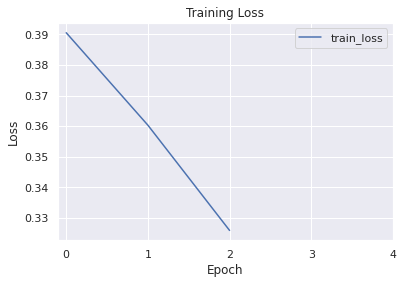

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

sns.set()

plt.plot(train_loss_values, label="train_loss")

plt.xlabel("Epoch")
plt.ylabel("Loss")
plt.title("Training Loss")
plt.legend()
plt.xticks(np.arange(0, 5))
plt.show()

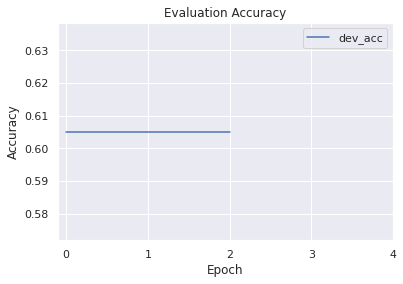

In [ ]:
plt.plot(dev_acc_values, label="dev_acc")

plt.xlabel("Epoch")
plt.ylabel("Accuracy")
plt.title("Evaluation Accuracy")
plt.legend()
plt.xticks(np.arange(0, 5))
plt.show()

In [ ]:
epoch_dev_accuracy

0.6051136363636364

In [ ]:
!pip3 install pandas_ml

In [ ]:
a = random(0,1,1)

TypeError: ignored

In [ ]:
len(predictions)

16

In [ ]:
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(predictions, labels)
cm

array([[0, 0],
       [8, 8]])

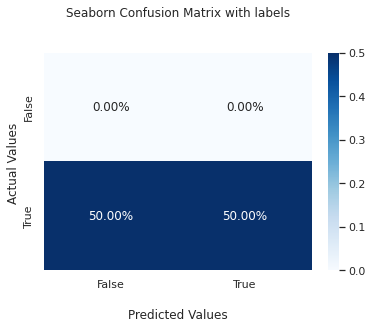

In [ ]:
ax = sns.heatmap(cm/np.sum(cm), annot=True, 
            fmt='.2%', cmap='Blues')

ax.set_title('Seaborn Confusion Matrix with labels\n\n');
ax.set_xlabel('\nPredicted Values')
ax.set_ylabel('Actual Values ');

## Ticket labels - List must be in alphabetical order
ax.xaxis.set_ticklabels(['False','True'])
ax.yaxis.set_ticklabels(['False','True'])

## Display the visualization of the Confusion Matrix.
plt.show()

# BERT


In [ ]:
!pip3 install deeppavlov

In [ ]:
!pip3 install transformers

In [ ]:
from deeppavlov.models.embedders.transformers_embedder import TransformersBertEmbedder
from transformers import AutoTokenizer, AutoModel, AutoModelForQuestionAnswering
tokenizer = AutoTokenizer.from_pretrained("AlexKay/xlm-roberta-large-qa-multilingual-finedtuned-ru")
model = AutoModelForQuestionAnswering.from_pretrained("AlexKay/xlm-roberta-large-qa-multilingual-finedtuned-ru")
tokenizer.save_pretrained('bert/')
model.save_pretrained('bert/')

#embedder = TransformersBertEmbedder(load_path='/content/drive/MyDrive/FinalDS/bert/pytorch_model.bin', bert_config_file = '/content/drive/MyDrive/FinalDS/bert/bert_config.json')

In [14]:
model

XLMRobertaForQuestionAnswering(
  (roberta): RobertaModel(
    (embeddings): RobertaEmbeddings(
      (word_embeddings): Embedding(250002, 1024, padding_idx=1)
      (position_embeddings): Embedding(514, 1024, padding_idx=1)
      (token_type_embeddings): Embedding(1, 1024)
      (LayerNorm): LayerNorm((1024,), eps=1e-05, elementwise_affine=True)
      (dropout): Dropout(p=0.1, inplace=False)
    )
    (encoder): RobertaEncoder(
      (layer): ModuleList(
        (0): RobertaLayer(
          (attention): RobertaAttention(
            (self): RobertaSelfAttention(
              (query): Linear(in_features=1024, out_features=1024, bias=True)
              (key): Linear(in_features=1024, out_features=1024, bias=True)
              (value): Linear(in_features=1024, out_features=1024, bias=True)
              (dropout): Dropout(p=0.1, inplace=False)
            )
            (output): RobertaSelfOutput(
              (dense): Linear(in_features=1024, out_features=1024, bias=True)
          

# ROberta


In [15]:
# Apply the tokenizer to the input text, treating them as a text-pair.
input_ids = tokenizer.encode(ds['question'].all(), ds['passage'].all())

print('The input has a total of {:} tokens.'.format(len(input_ids)))

The input has a total of 127 tokens.


In [16]:
# BERT only needs the token IDs, but for the purpose of inspecting the 
# tokenizer's behavior, let's also get the token strings and display them.
tokens = tokenizer.convert_ids_to_tokens(input_ids)

# For each token and its id...
for token, id in zip(tokens, input_ids):
    
    # If this is the [SEP] token, add some space around it to make it stand out.
    if id == tokenizer.sep_token_id:
        print('')
    
    # Print the token string and its ID in two columns.
    print('{:<12} {:>6,}'.format(token, id))

    if id == tokenizer.sep_token_id:
        print('')
    

<s>               0
▁Правда      93,461
▁ли           1,656
▁а              252
стану        134,117
▁пере         1,741
и                89
мен           1,488
овали        62,852
?                32

</s>              2


</s>              2

▁Нур         98,232
-                 9
С             1,560
ул            9,080
та              205
́             4,868
н               303
▁—              292
▁столица     187,656
▁Республики  58,263
▁Казахстан   62,742
▁с              135
▁10             209
▁декабря     49,588
▁1997        10,586
▁года         2,699
.                 5
▁Го          11,630
род           9,302
▁расположен  53,841
▁на              29
▁север       37,156
е               103
▁страны      30,296
,                 4
▁на              29
▁берег       100,218
ах            1,214
▁ре           3,981
ки              751
▁И              804
шим          35,789
,                 4
▁административно 144,554
▁раздел      31,122
ён           17,272
▁на              29
▁4      

In [17]:
# Search the input_ids for the first instance of the `[SEP]` token.
sep_index = input_ids.index(tokenizer.sep_token_id)

# The number of segment A tokens includes the [SEP] token istelf.
num_seg_a = sep_index + 1

# The remainder are segment B.
num_seg_b = len(input_ids) - num_seg_a

# Construct the list of 0s and 1s.
segment_ids = [0]*num_seg_a + [0]*num_seg_b

# There should be a segment_id for every input token.
assert len(segment_ids) == len(input_ids)

In [20]:
# Run our example through the model.
outputs = model(torch.tensor([input_ids]), # The tokens representing our input text.
                             token_type_ids=torch.tensor([segment_ids]), # The segment IDs to differentiate question from answer_tex 
                             return_dict=True) 

start_scores = outputs.start_logits
end_scores = outputs.end_logits


QuestionAnsweringModelOutput([('start_logits',
                               tensor([[-3.0412, -5.4040, -6.3082, -5.0056]], grad_fn=<CloneBackward0>)),
                              ('end_logits',
                               tensor([[-3.0570, -5.1271, -3.5921, -2.9238]], grad_fn=<CloneBackward0>))])

In [23]:
# Find the tokens with the highest `start` and `end` scores.
answer_start = torch.argmax(start_scores)
answer_end = torch.argmax(end_scores)

# Combine the tokens in the answer and print it out.
answer = ' '.join(tokens[answer_start:answer_end+1])

print('Answer: "' + answer + '"')

Answer: "▁Го род ом - мил ли он ером"


In [24]:
# Start with the first token.
answer = tokens[answer_start]

# Select the remaining answer tokens and join them with whitespace.
for i in range(answer_start + 1, answer_end + 1):
    
    # If it's a subword token, then recombine it with the previous token.
    if tokens[i][0:2] == '##':
        answer += tokens[i][2:]
    
    # Otherwise, add a space then the token.
    else:
        answer += ' ' + tokens[i]

print('Answer: "' + answer + '"')

Answer: "▁Го род ом - мил ли он ером"


In [26]:
import matplotlib.pyplot as plt
import seaborn as sns

# Use plot styling from seaborn.
sns.set(style='darkgrid')

# Increase the plot size and font size.
#sns.set(font_scale=1.5)
plt.rcParams["figure.figsize"] = (16,8)

In [27]:
# Pull the scores out of PyTorch Tensors and convert them to 1D numpy arrays.
s_scores = start_scores.detach().numpy().flatten()
e_scores = end_scores.detach().numpy().flatten()

# We'll use the tokens as the x-axis labels. In order to do that, they all need
# to be unique, so we'll add the token index to the end of each one.
token_labels = []
for (i, token) in enumerate(tokens):
    token_labels.append('{:} - {:>2}'.format(token, i))


/home/leysh/miniconda3/envs/pavlov/lib/python3.7/site-packages/ipykernel_launcher.py:2: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  


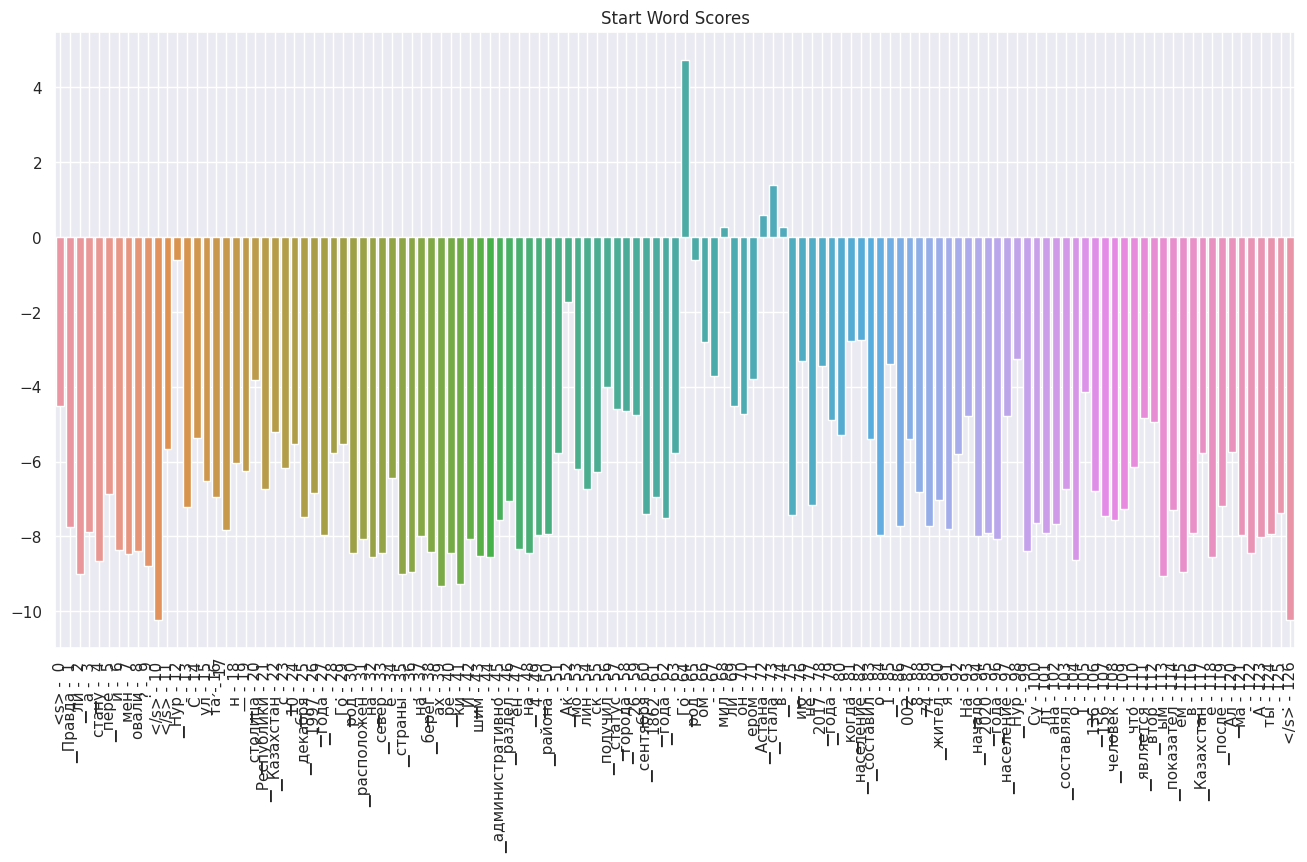

In [28]:
# Create a barplot showing the start word score for all of the tokens.
ax = sns.barplot(x=token_labels, y=s_scores, ci=None)

# Turn the xlabels vertical.
ax.set_xticklabels(ax.get_xticklabels(), rotation=90, ha="center")

# Turn on the vertical grid to help align words to scores.
ax.grid(True)

plt.title('Start Word Scores')

plt.show()

/home/leysh/miniconda3/envs/pavlov/lib/python3.7/site-packages/ipykernel_launcher.py:2: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  


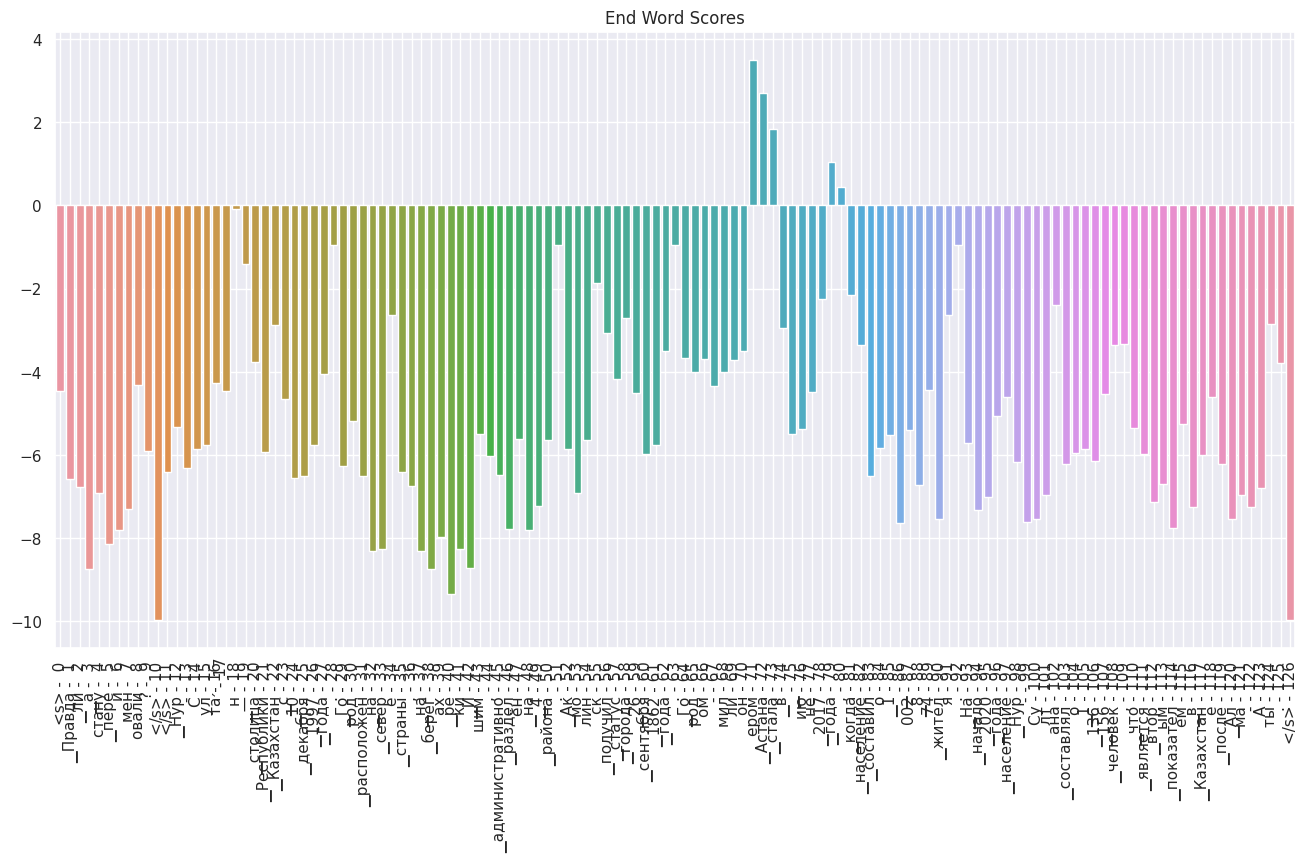

In [29]:
# Create a barplot showing the end word score for all of the tokens.
ax = sns.barplot(x=token_labels, y=e_scores, ci=None)

# Turn the xlabels vertical.
ax.set_xticklabels(ax.get_xticklabels(), rotation=90, ha="center")

# Turn on the vertical grid to help align words to scores.
ax.grid(True)

plt.title('End Word Scores')

plt.show()

In [30]:
import pandas as pd

# Store the tokens and scores in a DataFrame. 
# Each token will have two rows, one for its start score and one for its end
# score. The "marker" column will differentiate them. A little wacky, I know.
scores = []
for (i, token_label) in enumerate(token_labels):

    # Add the token's start score as one row.
    scores.append({'token_label': token_label, 
                   'score': s_scores[i],
                   'marker': 'start'})
    
    # Add  the token's end score as another row.
    scores.append({'token_label': token_label, 
                   'score': e_scores[i],
                   'marker': 'end'})
    
df = pd.DataFrame(scores)


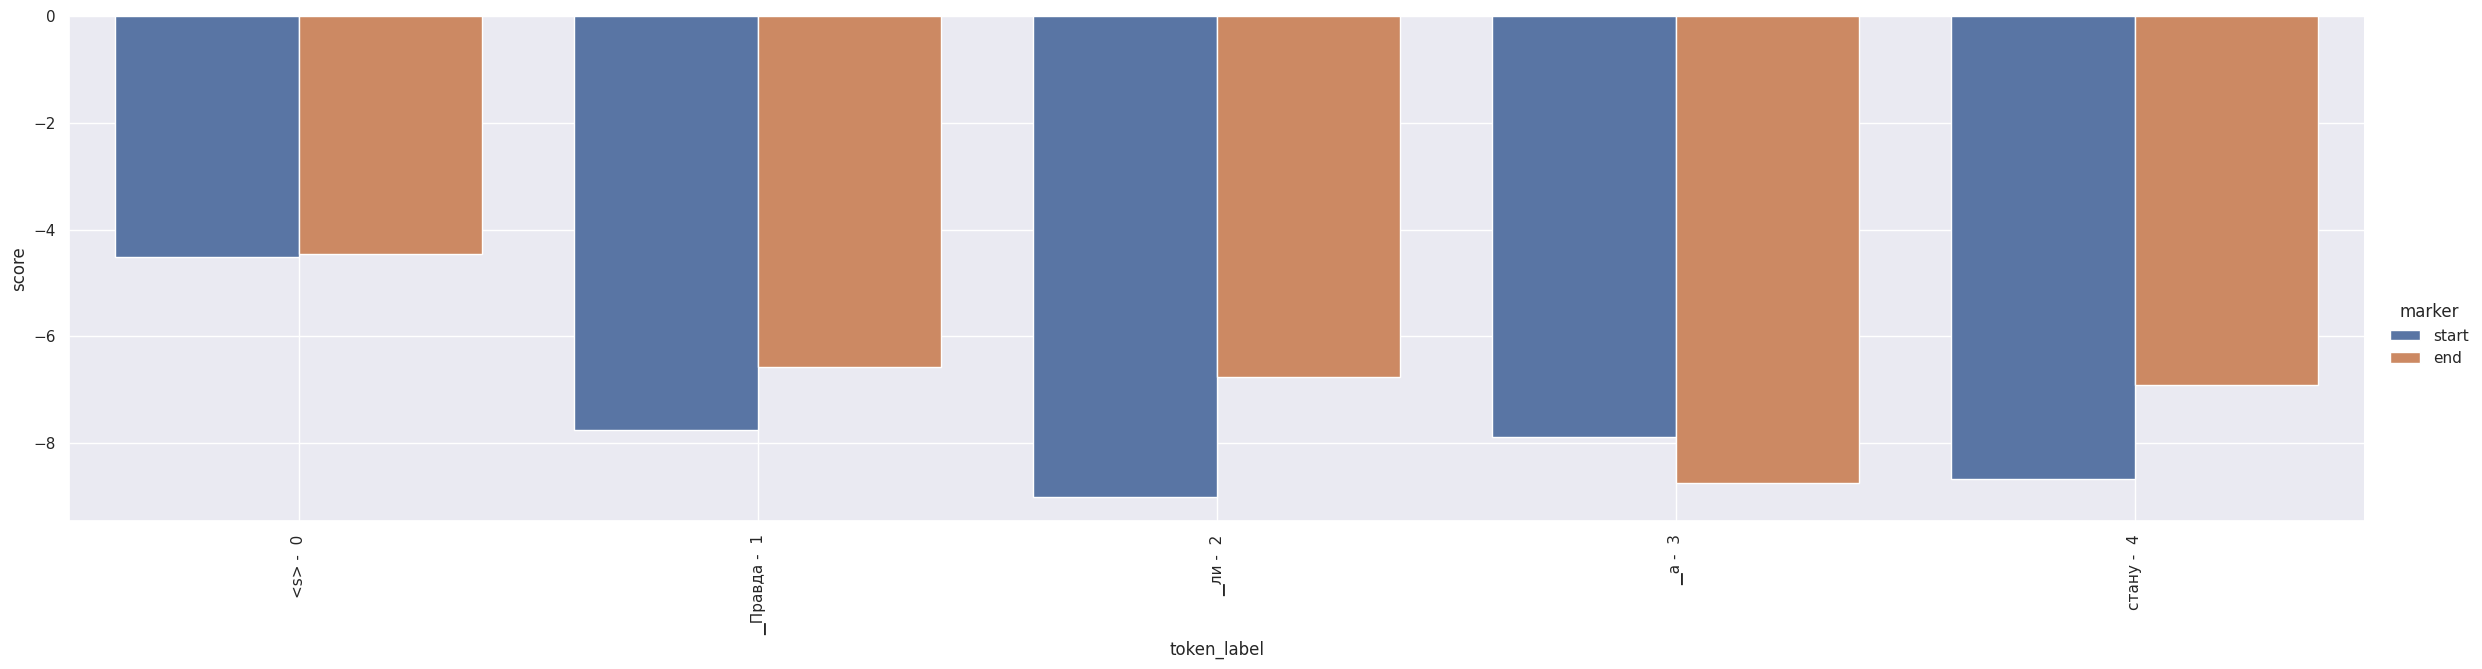

In [31]:
# Draw a grouped barplot to show start and end scores for each word.
# The "hue" parameter is where we tell it which datapoints belong to which
# of the two series.
g = sns.catplot(x="token_label", y="score", hue="marker", data=df[:10],
                kind="bar", height=6, aspect=4)

# Turn the xlabels vertical.
g.set_xticklabels(g.ax.get_xticklabels(), rotation=90, ha="center")

# Turn on the vertical grid to help align words to scores.
g.ax.grid(True)


In [32]:
def answer_question(question, answer_text):
    '''
    Takes a `question` string and an `answer_text` string (which contains the
    answer), and identifies the words within the `answer_text` that are the
    answer. Prints them out.
    '''
    # ======== Tokenize ========
    # Apply the tokenizer to the input text, treating them as a text-pair.
    input_ids = tokenizer.encode(question, answer_text)

    # Report how long the input sequence is.
    print('Query has {:,} tokens.\n'.format(len(input_ids)))

    # ======== Set Segment IDs ========
    # Search the input_ids for the first instance of the `[SEP]` token.
    sep_index = input_ids.index(tokenizer.sep_token_id)

    # The number of segment A tokens includes the [SEP] token istelf.
    num_seg_a = sep_index + 1

    # The remainder are segment B.
    num_seg_b = len(input_ids) - num_seg_a

    # Construct the list of 0s and 1s.
    segment_ids = [0]*num_seg_a + [0]*num_seg_b

    # There should be a segment_id for every input token.
    assert len(segment_ids) == len(input_ids)

    # ======== Evaluate ========
    # Run our example through the model.
    outputs = model(torch.tensor([input_ids]), # The tokens representing our input text.
                    token_type_ids=torch.tensor([segment_ids]), # The segment IDs to differentiate question from answer_text
                    return_dict=True) 

    start_scores = outputs.start_logits
    end_scores = outputs.end_logits

    # ======== Reconstruct Answer ========
    # Find the tokens with the highest `start` and `end` scores.
    answer_start = torch.argmax(start_scores)
    answer_end = torch.argmax(end_scores)

    # Get the string versions of the input tokens.
    tokens = tokenizer.convert_ids_to_tokens(input_ids)

    # Start with the first token.
    answer = tokens[answer_start]

    # Select the remaining answer tokens and join them with whitespace.
    for i in range(answer_start + 1, answer_end + 1):
        
        # If it's a subword token, then recombine it with the previous token.
        if tokens[i][0:2] == '##':
            answer += tokens[i][2:]
        
        # Otherwise, add a space then the token.
        else:
            answer += ' ' + tokens[i]

    print('Answer: "' + answer + '"')

In [33]:
import textwrap

# Wrap text to 80 characters.
wrapper = textwrap.TextWrapper(width=80) 

bert_abstract = "отметив некоторые недостатки и в целом удачную конструкцию, специалисты гау не рекомендовали принимать пп калашникова на вооружение по технологическим причинам. заключение гласило: с 1942 года калашников работал на центральном научно-исследовательском полигоне стрелкового и миномётного вооружения гау ркка. здесь в 1944 году он создал опытный образец самозарядного карабина, который, хотя и не вышел в серийное производство, частично послужил прототипом для создания автомата. с 1945 года михаил калашников начал разработку автоматического оружия под промежуточный патрон 7,62×39 образца 1943 года. автомат калашникова победил в конкурсе 1947 года и был принят на вооружение."

print(wrapper.fill(bert_abstract))

отметив некоторые недостатки и в целом удачную конструкцию, специалисты гау не
рекомендовали принимать пп калашникова на вооружение по технологическим
причинам. заключение гласило: с 1942 года калашников работал на центральном
научно-исследовательском полигоне стрелкового и миномётного вооружения гау ркка.
здесь в 1944 году он создал опытный образец самозарядного карабина, который,
хотя и не вышел в серийное производство, частично послужил прототипом для
создания автомата. с 1945 года михаил калашников начал разработку
автоматического оружия под промежуточный патрон 7,62×39 образца 1943 года.
автомат калашникова победил в конкурсе 1947 года и был принят на вооружение.


In [34]:
question = "был ли автомат калашникова в вов?"

answer_question(question, bert_abstract)

Query has 176 tokens.

Answer: "▁победи л ▁в ▁конкурсе ▁1947 ▁года"


In [35]:
!pip3 install Trainer

huggingface/tokenizers: The current process just got forked, after parallelism has already been used. Disabling parallelism to avoid deadlocks...
To disable this warning, you can either:
	- Avoid using `tokenizers` before the fork if possible
	- Explicitly set the environment variable TOKENIZERS_PARALLELISM=(true | false)
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 42.4/42.4 kB 597.4 kB/s eta 0:00:00 0:00:01
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 138.8/138.8 kB 2.1 MB/s eta 0:00:00a 0:00:01
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 125.4/125.4 kB 7.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.1/1.1 MB 9.1 MB/s eta 0:00:00a 0:00:01m
  Attempting uninstall: protobuf
    Found existing installation: protobuf 3.20.3
    Uninstalling protobuf-3.20.3:
      Successfully uninstalled protobuf-3.20.3
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency c

In [36]:
trainer.train()

NameError: name 'trainer' is not defined

# Все остальные эксперименты


#BERT FINAL

In [ ]:
train_df = ds[:1600]
train_df.head()
test_df = ds[1600:]
test_df.head()

,label,idx,all
1600,1,1601,выявлена ли корреляция данных кена юка с данными публикуемыми стерном и стюартом с момента представления концепции eva широким профессиональным и научным кругам большое количество исследований было направлено на выявления значимых корректировок eva в 1997 году кен юк провёл масштабное исследование сравнив собственные расчётные данные eva 1000 крупнейших компаний с данными публикуемыми стерном и стюартом несмотря на небольшое количество корректировок в разработанной им методике результаты расчёта eva оказались сильно коррелированными с расчётами разработчиков модели кроме того множество других авторов предложило свои методики корректировки бухгалтерских данных большинство из которых основано на корректировке капитальных эквивалентов
1601,0,1602,занимало ли понятие цивилизация центральное место в сочинениях вико вольтера и гердера в xix веке европейские историки получив первые сведения о восточных обществах пришли к выводу что между обществами находящимися на стадии цивилизационного развития могут существовать качественные различия что позволило им говорить не об одной цивилизации а о нескольких цивилизациях впрочем представления о культурных различиях между европейской и неевропейскими культурами появились ещё раньше к примеру российский исследователь и н ионов трактует заявления итальянского философа джамбаттисты вико 1668—1744 о том что император китайский в высшей степени культурен как зародыш представлений о существовании особой китайской цивилизации а значит и о вероятной множественности цивилизаций тем не менее ни в его работах ни в сочинениях вольтера и иоганна готфрида гердера выражавших идеи родственные идеям вико понятие цивилизация не было главенствующим а понятие локальная цивилизация не употреблялось вовсе12
1602,0,1603,признают ли в российской федерации чуп в качестве самостоятельной организации в большинстве стран снг существуют также частные унитарные предприятия чуп не наделённые правом собственности на закреплённое за ним имущество имущество является неделимым и не может быть распределено по вкладам паям долям акциям и находится в общей совместной собственности его членов физических лиц одного физического лица или одного юридического лица к таковым относят крестьянские фермерские хозяйства индивидуальные семейные и дочерние предприятия в российской федерации в качестве самостоятельных организаций за исключением дочерних предприятий таковые не признаются а руководители таких организаций являются индивидуальными предпринимателями что создаёт имущественные и организационные трудности у индивидуального предпринимателя фактически предприятия так например отсутствует право частной собственности на предприятие как на имущественный комплекс поскольку предприятие предполагает дополнительные хозяйственные отношения чего нет при индивидуальном предпринимательстве нет чёткого регламента положения членов в предприятии распределения прибыли и ответственности между ними и многих других аспектов
1603,1,1604,питается ли медведями амурский тигр амурские тигры и бурые медведи представляют довольно серьёзную опасность друг для друга существует много достоверных свидетельств агрессивного взаимодействия между ними бурые и гималайские медведи составляют 5—8 пищевого рациона амурского тигра тем самым занимая в нем третье место есть многочисленные сообщения о том что тигры убивают медвежат и даже нападают на взрослых медведей в основном этим промышляют взрослые самцы медведи в свою очередь способны иногда отнимать добычу у тигров и иногда даже нападать на тигриц и молодых самцов в голодное время малайские медведи губачи и обитающие на юге гималайские медведи являясь весьма агрессивными животными временами отгоняют тигров от добычи хотя чаще случается обратное коегде тигры также как и на севере целеустремлённо охотятся на этих медведей61
1604,1,1605,является ли обратимой реакция нуклеофильного замещения для реакций нуклеофильного замещения у sp2гибридного ацильного атома углерода реализируется двухстадийный м

In [ ]:
train_df_bert = pd.DataFrame({
    'id':range(len(train_df)),
    'label':train_df['label'],
    'alpha':['a']*train_df.shape[0],
    'text': train_df['all'].replace(r'\n', ' ', regex=True)
})

train_df_bert.head()

,id,label,alpha,text
0,0,1,a,вднх это выставочный центр «вы́ставочный центр» — станция московского монорельса расположена между станциями «улица академика королёва» и «улица сергея эйзенштейна» находится на территории останкинского района северовосточного административного округа города москвы переход на станцию вднх калужскорижской линии названа в честь всероссийского выставочного центра — названия вднх с 1992 по 2014 год 20 ноября 2004 года линия монорельса начала работать в «экскурсионном режиме» и перевезла первых пассажиров
1,1,1,a,вднх это выставочный центр вы́ставка достиже́ний наро́дного хозя́йства в 1959—1991 годах — вы́ставка достиже́ний наро́дного хозя́йства ссср в 1992—2014 годах — всеросси́йский вы́ставочный центр — выставочный комплекс в останкинском районе северовосточного административного округа города москвы второй по величине выставочный комплекс в городе входит в 50 крупнейших выставочных центров мира ежегодно вднх посещают 30 млн гостей 1 августа 2019 года выставка отпраздновала 80летний юбилей территориально вднх объединена с парком «останкино» и главным ботаническим садом их общая площадь составляет почти 700 га 2402 га — площадь вднх 756 га — площадь парка «останкино» 361 га — площадь гбс 95 га музейновыставочный центр «рабочий и колхозница» и площадь перед аркой главного входа на территории выставки расположено множество шедевров архитектуры — 49 объектов вднх признаны памятниками культурного наследия
2,2,1,a,был ли джиган в black star вместе с этим треком они выступили на церемонии вручения наград mtv rma — это был первый выход джигана на большую сцену в 2007 году джиган стал официальным артистом лейбла black star inc выпустил первый песню и клип «одноклассница» — совместная работа с тимати в марте 2011 года появилась совместная с юлей савичевой композиция «отпусти» песня поднялась в радиочарте «tophit» до 8 места и заняла первое место чарта weekly audience choice top hit количество просмотров клипа на youtube превысило 17 миллионов
3,3,1,a,xiaomi конкурент apple xiaomi — китайская компания основанная в 2010 году и занимающаяся выпуском электроники и бытовой техники а также разработкой программного обеспечения основной продукцией компании являются смартфоны первый из которых был выпущен в 2011 году в настоящее время xiaomi производит широкий ассортимент смартфонов в разных ценовых сегментах и является одним из крупнейших производителей смартфонов в мире так в третьем квартале 2014 года эта компания заняла наивысшее для себя третье место в мире по поставкам смартфонов набрав 52 в штучном выражении и уступив лишь samsung и apple за весь 2017 год компания заняла по продажам первое место в китае и второе место в индии в данном списке приводятся все смартфоны когдалибо выпущенные компанией xiaomi
4,4,0,a,был ли автомат калашникова в вов отметив некоторые недостатки и в целом удачную конструкцию специалисты гау не рекомендовали принимать пп калашникова на вооружение по технологическим причинам заключение гласило с 1942 года калашников работал на центральном научноисследовательском полигоне стрелкового и миномётного вооружения гау ркка здесь в 1944 году он создал опытный образец самозарядного карабина который хотя и не вышел в серийное производство частично послужил прототипом для создания автомата с 1945 года михаил калашников начал разработку автоматического оружия под промежуточный патрон 762×39 образца 1943 года автомат калашникова победил в конкурсе 1947 года и был принят на вооружение


In [ ]:
dev_df_bert = pd.DataFrame({
    'id':range(len(test_df)),
    'label':test_df['label'],
    'alpha':['a']*test_df.shape[0],
    'text': test_df['all'].replace(r'\n', ' ', regex=True)
})

dev_df_bert.head()

,id,label,alpha,text
1600,0,1,a,выявлена ли корреляция данных кена юка с данными публикуемыми стерном и стюартом с момента представления концепции eva широким профессиональным и научным кругам большое количество исследований было направлено на выявления значимых корректировок eva в 1997 году кен юк провёл масштабное исследование сравнив собственные расчётные данные eva 1000 крупнейших компаний с данными публикуемыми стерном и стюартом несмотря на небольшое количество корректировок в разработанной им методике результаты расчёта eva оказались сильно коррелированными с расчётами разработчиков модели кроме того множество других авторов предложило свои методики корректировки бухгалтерских данных большинство из которых основано на корректировке капитальных эквивалентов
1601,1,0,a,занимало ли понятие цивилизация центральное место в сочинениях вико вольтера и гердера в xix веке европейские историки получив первые сведения о восточных обществах пришли к выводу что между обществами находящимися на стадии цивилизационного развития могут существовать качественные различия что позволило им говорить не об одной цивилизации а о нескольких цивилизациях впрочем представления о культурных различиях между европейской и неевропейскими культурами появились ещё раньше к примеру российский исследователь и н ионов трактует заявления итальянского философа джамбаттисты вико 1668—1744 о том что император китайский в высшей степени культурен как зародыш представлений о существовании особой китайской цивилизации а значит и о вероятной множественности цивилизаций тем не менее ни в его работах ни в сочинениях вольтера и иоганна готфрида гердера выражавших идеи родственные идеям вико понятие цивилизация не было главенствующим а понятие локальная цивилизация не употреблялось вовсе12
1602,2,0,a,признают ли в российской федерации чуп в качестве самостоятельной организации в большинстве стран снг существуют также частные унитарные предприятия чуп не наделённые правом собственности на закреплённое за ним имущество имущество является неделимым и не может быть распределено по вкладам паям долям акциям и находится в общей совместной собственности его членов физических лиц одного физического лица или одного юридического лица к таковым относят крестьянские фермерские хозяйства индивидуальные семейные и дочерние предприятия в российской федерации в качестве самостоятельных организаций за исключением дочерних предприятий таковые не признаются а руководители таких организаций являются индивидуальными предпринимателями что создаёт имущественные и организационные трудности у индивидуального предпринимателя фактически предприятия так например отсутствует право частной собственности на предприятие как на имущественный комплекс поскольку предприятие предполагает дополнительные хозяйственные отношения чего нет при индивидуальном предпринимательстве нет чёткого регламента положения членов в предприятии распределения прибыли и ответственности между ними и многих других аспектов
1603,3,1,a,питается ли медведями амурский тигр амурские тигры и бурые медведи представляют довольно серьёзную опасность друг для друга существует много достоверных свидетельств агрессивного взаимодействия между ними бурые и гималайские медведи составляют 5—8 пищевого рациона амурского тигра тем самым занимая в нем третье место есть многочисленные сообщения о том что тигры убивают медвежат и даже нападают на взрослых медведей в основном этим промышляют взрослые самцы медведи в свою очередь способны иногда отнимать добычу у тигров и иногда даже нападать на тигриц и молодых самцов в голодное время малайские медведи губачи и обитающие на юге гималайские медведи являясь весьма агрессивными животными временами отгоняют тигров от добычи хотя чаще случается обратное коегде тигры также как и на севере целеустремлённо охотятся на этих медведей61
1604,4,1,a,является ли обратимой реакция нуклеофильного замещения для реакций нуклеофильного замещения у sp2гибридного ацильного атома углерода реализируется двухстадийный 

In [ ]:
train_df_bert.to_csv('/content/drive/MyDrive/FinalDS/train.tsv', sep='\t', index=False, header=False)
dev_df_bert.to_csv('/content/drive/MyDrive/FinalDS/dev.tsv', sep='\t', index=False, header=False)

In [ ]:

!pip3 install deeppavlov

In [ ]:

!pip3 install transformers

In [ ]:
from __future__ import absolute_import, division, print_function

import csv
import os
import sys
import logging

logger = logging.getLogger()
csv.field_size_limit(2147483647) # Increase CSV reader's field limit incase we have long text.


class InputExample(object):
    """A single training/test example for simple sequence classification."""

    def __init__(self, guid, text_a, text_b=None, label=None):
        """Constructs a InputExample.
        Args:
            guid: Unique id for the example.
            text_a: string. The untokenized text of the first sequence. For single
            sequence tasks, only this sequence must be specified.
            text_b: (Optional) string. The untokenized text of the second sequence.
            Only must be specified for sequence pair tasks.
            label: (Optional) string. The label of the example. This should be
            specified for train and dev examples, but not for test examples.
        """
        self.guid = guid
        self.text_a = text_a
        self.text_b = text_b
        self.label = label


class DataProcessor(object):
    """Base class for data converters for sequence classification data sets."""

    def get_train_examples(self, data_dir):
        """Gets a collection of `InputExample`s for the train set."""
        raise NotImplementedError()

    def get_dev_examples(self, data_dir):
        """Gets a collection of `InputExample`s for the dev set."""
        raise NotImplementedError()

    def get_labels(self):
        """Gets the list of labels for this data set."""
        raise NotImplementedError()

    @classmethod
    def _read_tsv(cls, input_file, quotechar=None):
        """Reads a tab separated value file."""
        with open(input_file, "r", encoding="utf-8") as f:
            reader = csv.reader(f, delimiter="\t", quotechar=quotechar)
            lines = []
            for line in reader:
                if sys.version_info[0] == 2:
                    line = list(unicode(cell, 'utf-8') for cell in line)
                lines.append(line)
            return lines


class BinaryClassificationProcessor(DataProcessor):
    """Processor for binary classification dataset."""

    def get_train_examples(self, data_dir):
        """See base class."""
        return self._create_examples(
            self._read_tsv(os.path.join(data_dir, "train.tsv")), "train")

    def get_dev_examples(self, data_dir):
        """See base class."""
        return self._create_examples(
            self._read_tsv(os.path.join(data_dir, "dev.tsv")), "dev")

    def get_labels(self):
        """See base class."""
        return ["0", "1"]

    def _create_examples(self, lines, set_type):
        """Creates examples for the training and dev sets."""
        examples = []
        for (i, line) in enumerate(lines):
            guid = "%s-%s" % (set_type, i)
            text_a = line[3]
            label = line[1]
            examples.append(
                InputExample(guid=guid, text_a=text_a, text_b=None, label=label))
        return examples

In [ ]:
class InputFeatures(object):
    """A single set of features of data."""

    def __init__(self, input_ids, input_mask, segment_ids, label_id):
        self.input_ids = input_ids
        self.input_mask = input_mask
        self.segment_ids = segment_ids
        self.label_id = label_id


def _truncate_seq_pair(tokens_a, tokens_b, max_length):
    """Truncates a sequence pair in place to the maximum length."""

    # This is a simple heuristic which will always truncate the longer sequence
    # one token at a time. This makes more sense than truncating an equal percent
    # of tokens from each, since if one sequence is very short then each token
    # that's truncated likely contains more information than a longer sequence.
    while True:
        total_length = len(tokens_a) + len(tokens_b)
        if total_length <= max_length:
            break
        if len(tokens_a) > len(tokens_b):
            tokens_a.pop()
        else:
            tokens_b.pop()


def convert_example_to_feature(example_row):
    # return example_row
    example, label_map, max_seq_length, tokenizer, output_mode = example_row

    tokens_a = tokenizer.tokenize(example.text_a)

    tokens_b = None
    if example.text_b:
        tokens_b = tokenizer.tokenize(example.text_b)
        # Modifies `tokens_a` and `tokens_b` in place so that the total
        # length is less than the specified length.
        # Account for [CLS], [SEP], [SEP] with "- 3"
        _truncate_seq_pair(tokens_a, tokens_b, max_seq_length - 3)
    else:
        # Account for [CLS] and [SEP] with "- 2"
        if len(tokens_a) > max_seq_length - 2:
            tokens_a = tokens_a[:(max_seq_length - 2)]

    tokens = ["[CLS]"] + tokens_a + ["[SEP]"]
    segment_ids = [0] * len(tokens)

    if tokens_b:
        tokens += tokens_b + ["[SEP]"]
        segment_ids += [1] * (len(tokens_b) + 1)

    input_ids = tokenizer.convert_tokens_to_ids(tokens)

    # The mask has 1 for real tokens and 0 for padding tokens. Only real
    # tokens are attended to.
    input_mask = [1] * len(input_ids)

    # Zero-pad up to the sequence length.
    padding = [0] * (max_seq_length - len(input_ids))
    input_ids += padding
    input_mask += padding
    segment_ids += padding

    assert len(input_ids) == max_seq_length
    assert len(input_mask) == max_seq_length
    assert len(segment_ids) == max_seq_length

    if output_mode == "classification":
        label_id = label_map[example.label]
    elif output_mode == "regression":
        label_id = float(example.label)
    else:
        raise KeyError(output_mode)

    return InputFeatures(input_ids=input_ids,
                         input_mask=input_mask,
                         segment_ids=segment_ids,
                         label_id=label_id)

In [ ]:
!pip3 install pytorch_pretrained_bert

In [ ]:
!pip3 install tools

In [ ]:
!pip3 install convert_examples_to_features

ERROR: Could not find a version that satisfies the requirement convert_examples_to_features (from versions: none)
ERROR: No matching distribution found for convert_examples_to_features


In [ ]:
import torch
import pickle
from torch.utils.data import (DataLoader, RandomSampler, SequentialSampler, TensorDataset)
from torch.nn import CrossEntropyLoss, MSELoss

from tqdm import tqdm_notebook, trange
import os
from pytorch_pretrained_bert import BertTokenizer, BertModel, BertForMaskedLM, BertForSequenceClassification
from pytorch_pretrained_bert.optimization import BertAdam, WarmupLinearSchedule

from multiprocessing import Pool, cpu_count
from tools import *


# OPTIONAL: if you want to have more information on what's happening, activate the logger as follows
import logging
logging.basicConfig(level=logging.INFO)

device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
# The input data dir. Should contain the .tsv files (or other data files) for the task.
DATA_DIR = "/content/drive/MyDrive/FinalDS/"

# Bert pre-trained model selected in the list: bert-base-uncased, 
# bert-large-uncased, bert-base-cased, bert-large-cased, bert-base-multilingual-uncased,
# bert-base-multilingual-cased, bert-base-chinese.
BERT_MODEL = 'DeepPavlov/rubert-base-cased-conversational'

# The name of the task to train.I'm going to name this 'yelp'.
TASK_NAME = 'yelp'

# The output directory where the fine-tuned model and checkpoints will be written.
OUTPUT_DIR = f'outputs/{TASK_NAME}/'

# The directory where the evaluation reports will be written to.
REPORTS_DIR = f'reports/{TASK_NAME}_evaluation_report/'

# This is where BERT will look for pre-trained models to load parameters from.
CACHE_DIR = 'cache/'

# The maximum total input sequence length after WordPiece tokenization.
# Sequences longer than this will be truncated, and sequences shorter than this will be padded.
MAX_SEQ_LENGTH = 300

TRAIN_BATCH_SIZE = 48
EVAL_BATCH_SIZE = 32
LEARNING_RATE = 2e-5
NUM_TRAIN_EPOCHS = 5
RANDOM_SEED = 42
GRADIENT_ACCUMULATION_STEPS = 1
WARMUP_PROPORTION = 0.1
OUTPUT_MODE = 'classification'

CONFIG_NAME = "config.json"
WEIGHTS_NAME = "pytorch_model.bin"
output_mode = OUTPUT_MODE

cache_dir = CACHE_DIR
if os.path.exists(REPORTS_DIR) and os.listdir(REPORTS_DIR):
        REPORTS_DIR += f'/report_{len(os.listdir(REPORTS_DIR))}'
        os.makedirs(REPORTS_DIR)
if not os.path.exists(REPORTS_DIR):
    os.makedirs(REPORTS_DIR)
    REPORTS_DIR += f'/report_{len(os.listdir(REPORTS_DIR))}'
    os.makedirs(REPORTS_DIR)
if os.path.exists(OUTPUT_DIR) and os.listdir(OUTPUT_DIR):
        raise ValueError("Output directory ({}) already exists and is not empty.".format(OUTPUT_DIR))
if not os.path.exists(OUTPUT_DIR):
    os.makedirs(OUTPUT_DIR)

In [ ]:
processor = BinaryClassificationProcessor()
train_examples = processor.get_train_examples(DATA_DIR)
train_examples_len = len(train_examples)
label_list = processor.get_labels() # [0, 1] for binary classification
num_labels = len(label_list)
num_train_optimization_steps = int(train_examples_len / TRAIN_BATCH_SIZE / GRADIENT_ACCUMULATION_STEPS) * NUM_TRAIN_EPOCHS

In [ ]:
from transformers import AutoTokenizer, AutoModel
# Load pre-trained model tokenizer (vocabulary)
tokenizer = AutoTokenizer.from_pretrained("DeepPavlov/rubert-base-cased-conversational", do_lower_case=False)


/usr/local/lib/python3.7/dist-packages/cryptography/hazmat/backends/openssl/x509.py:17: CryptographyDeprecationWarning: This version of cryptography contains a temporary pyOpenSSL fallback path. Upgrade pyOpenSSL now.
  utils.DeprecatedIn35,


In [ ]:
label_map = {label: i for i, label in enumerate(label_list)}
train_examples_for_processing = [(example, label_map, MAX_SEQ_LENGTH, tokenizer, OUTPUT_MODE) for example in train_examples]

In [ ]:
process_count = cpu_count() - 1
if __name__ ==  '__main__':
    print(f'Preparing to convert {train_examples_len} examples..')
    print(f'Spawning {process_count} processes..')
    with Pool(process_count) as p:
        train_features = list(tqdm_notebook(p.imap(convert_example_to_feature, train_examples_for_processing), total=train_examples_len))


with open(DATA_DIR + "train_features.pkl", "wb") as f:
    pickle.dump(train_features, f)

Preparing to convert 1600 examples..
Spawning 1 processes..


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:6: TqdmDeprecationWarning: This function will be removed in tqdm==5.0.0
Please use `tqdm.notebook.tqdm` instead of `tqdm.tqdm_notebook`
  


  0%|          | 0/1600 [00:00<?, ?it/s]

In [ ]:
# Load pre-trained model (weights)
model = AutoModel.from_pretrained(BERT_MODEL, cache_dir=CACHE_DIR, num_labels=num_labels)

/usr/local/lib/python3.7/dist-packages/cryptography/hazmat/backends/openssl/x509.py:17: CryptographyDeprecationWarning: This version of cryptography contains a temporary pyOpenSSL fallback path. Upgrade pyOpenSSL now.
  utils.DeprecatedIn35,
Some weights of the model checkpoint at DeepPavlov/rubert-base-cased-conversational were not used when initializing BertModel: ['cls.seq_relationship.bias', 'cls.predictions.decoder.weight', 'cls.predictions.decoder.bias', 'cls.predictions.transform.dense.bias', 'cls.predictions.transform.LayerNorm.weight', 'cls.predictions.transform.LayerNorm.bias', 'cls.predictions.bias', 'cls.seq_relationship.weight', 'cls.predictions.transform.dense.weight']
- This IS expected if you are initializing BertModel from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing BertModel from the checkpoint of 

In [ ]:
model.to(device)

BertModel(
  (embeddings): BertEmbeddings(
    (word_embeddings): Embedding(119547, 768, padding_idx=0)
    (position_embeddings): Embedding(512, 768)
    (token_type_embeddings): Embedding(2, 768)
    (LayerNorm): LayerNorm((768,), eps=1e-12, elementwise_affine=True)
    (dropout): Dropout(p=0.1, inplace=False)
  )
  (encoder): BertEncoder(
    (layer): ModuleList(
      (0): BertLayer(
        (attention): BertAttention(
          (self): BertSelfAttention(
            (query): Linear(in_features=768, out_features=768, bias=True)
            (key): Linear(in_features=768, out_features=768, bias=True)
            (value): Linear(in_features=768, out_features=768, bias=True)
            (dropout): Dropout(p=0.1, inplace=False)
          )
          (output): BertSelfOutput(
            (dense): Linear(in_features=768, out_features=768, bias=True)
            (LayerNorm): LayerNorm((768,), eps=1e-12, elementwise_affine=True)
            (dropout): Dropout(p=0.1, inplace=False)
         

In [ ]:
param_optimizer = list(model.named_parameters())
no_decay = ['bias', 'LayerNorm.bias', 'LayerNorm.weight']
optimizer_grouped_parameters = [
    {'params': [p for n, p in param_optimizer if not any(nd in n for nd in no_decay)], 'weight_decay': 0.01},
    {'params': [p for n, p in param_optimizer if any(nd in n for nd in no_decay)], 'weight_decay': 0.0}
    ]

In [ ]:
optimizer = BertAdam(optimizer_grouped_parameters,
                     lr=LEARNING_RATE,
                     warmup=WARMUP_PROPORTION,
                     t_total=num_train_optimization_steps)

In [ ]:
global_step = 0
nb_tr_steps = 0
tr_loss = 0

In [ ]:
model.train()
for _ in trange(int(NUM_TRAIN_EPOCHS), desc="Epoch"):
    tr_loss = 0
    correct = 0
    nb_tr_examples, nb_tr_steps = 0, 0
    for step, batch in enumerate(tqdm_notebook(train_dataloader, desc="Iteration")):
        batch = tuple(t.to(device) for t in batch)
        input_ids, input_mask, segment_ids, label_ids = batch

        logits = model(input_ids, segment_ids, input_mask)# labels=None)

        if OUTPUT_MODE == "classification":
            loss_fct = CrossEntropyLoss()
            loss = loss_fct(logits[-1], label_ids)
        elif OUTPUT_MODE == "regression":
            loss_fct = MSELoss()
            loss = loss_fct(logits.view(-1), label_ids.view(-1))

        if GRADIENT_ACCUMULATION_STEPS > 1:
            loss = loss / GRADIENT_ACCUMULATION_STEPS

        loss.backward()
        
        print("\r%f" % loss, end='')
        
        tr_loss += loss.item()
        nb_tr_examples += input_ids.size(0)
        nb_tr_steps += 1
        if (step + 1) % GRADIENT_ACCUMULATION_STEPS == 0:
            optimizer.step()
            optimizer.zero_grad()
            global_step += 1
    #loss = 4,7
    

Epoch:   0%|          | 0/5 [00:00<?, ?it/s]


NameError: ignored

In [ ]:
loss

tensor(4.7740, grad_fn=<NllLossBackward0>)

torch.Size([24, 768])

In [ ]:
model_to_save = model.module if hasattr(model, 'module') else model  # Only save the model it-self
  
# If we save using the predefined names, we can load using `from_pretrained`
output_model_file = os.path.join(OUTPUT_DIR, WEIGHTS_NAME)
output_config_file = os.path.join(OUTPUT_DIR, CONFIG_NAME)

torch.save(model_to_save.state_dict(), output_model_file)
model_to_save.config.to_json_file(output_config_file)
tokenizer.save_vocabulary(OUTPUT_DIR)

#wek2vek


In [ ]:
# output shape is (batch_size x max_num_tokens_in_the_batch x embedding_dim)
embedded_batch = (str_lower(tokenizer([' джиган был в black star ']))) 
len(embedded_batch), len(embedded_batch[0]), embedded_batch[0][0]

NameError: ignored

In [ ]:
from deeppavlov.metrics.accuracy import sets_accuracy

# get all train and valid data from iterator
x_train, y_train = train_iterator.get_instances(data_type="train")
x_valid, y_valid = train_iterator.get_instances(data_type="valid")

In [ ]:
tokenizer(str(x_train))

{'input_ids': [101, 120, 118, 1127, 942, 20610, 55403, 20610, 4712, 552, 72199, 809, 22370, 552, 444, 340, 10279, 86624, 11074, 1144, 883, 29162, 5891, 25159, 1300, 9487, 444, 54529, 49098, 340, 3661, 336, 2469, 801, 5566, 5961, 11880, 1404, 31659, 30935, 8534, 14142, 12623, 340, 12309, 2098, 26247, 340, 51342, 22365, 340, 4778, 2882, 37885, 6935, 1035, 4137, 18511, 322, 14072, 293, 20610, 1127, 8103, 9733, 1139, 47625, 13081, 6910, 876, 918, 24708, 13787, 4870, 7522, 336, 5976, 11880, 46341, 21481, 2774, 21858, 2389, 30935, 8534, 24375, 2882, 18576, 340, 26318, 27843, 1388, 1455, 10729, 1069, 940, 846, 26247, 336, 12194, 1404, 25904, 31065, 949, 4794, 1084, 48238, 340, 4604, 11923, 69006, 24739, 322, 1034, 2029, 12071, 18117, 26531, 14839, 30935, 8534, 802, 34070, 801, 13147, 8534, 887, 2320, 8185, 1300, 34713, 2219, 802, 1307, 22601, 64382, 3406, 1248, 322, 336, 31253, 71795, 340, 8374, 19258, 381, 2117, 1100, 4192, 58798, 1979, 801, 36837, 1519, 9378, 2469, 5961, 322, 1035, 840, 138

In [ ]:
len(tokenizer)

100792

In [ ]:
!pip3 install deeppavlov

     |████████████████████████████████| 880 kB 7.3 MB/s 
     |████████████████████████████████| 46 kB 4.0 MB/s 
     |████████████████████████████████| 43 kB 2.1 MB/s 
     |████████████████████████████████| 2.9 MB 40.9 MB/s 
     |████████████████████████████████| 510 kB 28.9 MB/s 
     |████████████████████████████████| 2.1 MB 33.1 MB/s 
     |████████████████████████████████| 20.1 MB 1.8 MB/s 
     |████████████████████████████████| 7.3 MB 32.6 MB/s 
     |████████████████████████████████| 53 kB 2.5 MB/s 
     |████████████████████████████████| 654 kB 25.5 MB/s 
     |████████████████████████████████| 6.7 MB 28.8 MB/s 
     |████████████████████████████████| 76 kB 4.9 MB/s 
     |████████████████████████████████| 57 kB 5.4 MB/s 
     |████████████████████████████████| 8.2 MB 18.4 MB/s 
     |████████████████████████████████| 10.4 MB 57.8 MB/s 
     |████████████████████████████████| 859 kB 42.5 MB/s 
     |████████████████████████████████| 40 kB 26 kB/s 
     |█████████████████████

In [ ]:
from deeppavlov.models.classifiers.keras_classification_model import KerasClassificationModel
from deeppavlov.models.preprocessors.one_hotter import OneHotter
from deeppavlov.models.classifiers.proba2labels import Proba2Labels
# Intialize `KerasClassificationModel` that composes CNN shallow-and-wide network 
# (name here as`cnn_model`)
cls = KerasClassificationModel(save_path="/content/drive/MyDrive/FinalDS", 
                               load_path="/content/drive/MyDrive/FinalDS", 
                               embedding_size= 100,
                               n_classes=classes_vocab.len,
                               model_name="cnn_model",
                               text_size=15, # number of tokens
                               kernel_sizes_cnn=[3, 5, 7],
                               filters_cnn=128,
                               dense_size=100,
                               optimizer="Adam",
                               learning_rate=0.1,
                               learning_rate_decay=0.01,
                               loss="categorical_crossentropy")

ModuleNotFoundError: ignored

TypeError: ignored

In [ ]:
from tqdm import tqdm
for ep in range(10):
    for x, y in train_iterator.gen_batches(batch_size=64, 
                                           data_type="train"):
        x_embed = (tokenizer(str_lower(x)))
        y_onehot = OneHotter(classes_vocab(y))
        cls.train_on_batch(x_embed, y_onehot)

/usr/local/lib/python3.7/dist-packages/numpy/core/_asarray.py:83: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  


ValueError: ignored

In [ ]:
# Save model weights and parameters
cls.save()

In [ ]:
# Infering on validation data we get probability distribution on given data.
y_valid_pred = cls(tokenizer(str_lower(x_valid))))


In [ ]:
prob2labels = Proba2Labels(max_proba=True)

In [ ]:
# Let's look into obtained result
print("Text sample: {}".format(x_valid[0]))
print("True label: {}".format(y_valid[0]))
print("Predicted probability distribution: {}".format(dict(zip(classes_vocab.keys(), 
                                                               y_valid_pred[0]))))
print("Predicted label: {}".format(classes_vocab(prob2labels(y_valid_pred))[0]))

In [ ]:
# calculate sets accuracy
sets_accuracy(y_valid, classes_vocab(prob2labels(y_valid_pred)))

In [ ]:
import re
def tokenazation(text):
  tokens = re.split('\W+', text)
  return tokens

ds['all'] = ds['all'].apply(lambda x : tokenazation(x.lower()))
ds

,label,idx,all
0,1,0,"[вднх, это, выставочный, центр, вы, ставочный, центр, станция, московского, монорельса, расположена, между, станциями, улица, академика, королёва, и, улица, сергея, эйзенштейна, находится, на, территории, останкинского, района, северовосточного, административного, округа, города, москвы, переход, на, станцию, вднх, калужскорижской, линии, названа, в, честь, всероссийского, выставочного, центра, названия, вднх, с, 1992, по, 2014, год, 20, ноября, 2004, года, линия, монорельса, начала, работать, в, экскурсионном, режиме, и, перевезла, первых, пассажиров, ]"
1,1,1,"[вднх, это, выставочный, центр, вы, ставка, достиже, ний, наро, дного, хозя, йства, в, 1959, 1991, годах, вы, ставка, достиже, ний, наро, дного, хозя, йства, ссср, в, 1992, 2014, годах, всеросси, йский, вы, ставочный, центр, выставочный, комплекс, в, останкинском, районе, северовосточного, административного, округа, города, москвы, второй, по, величине, выставочный, комплекс, в, городе, входит, в, 50, крупнейших, выставочных, центров, мира, ежегодно, вднх, посещают, 30, млн, гостей, 1, августа, 2019, года, выставка, отпраздновала, 80летний, юбилей, территориально, вднх, объединена, с, парком, останкино, и, главным, ботаническим, садом, их, общая, площадь, составляет, почти, 700, га, 2402, га, площадь, вднх, 756, га, площадь, парка, останкино, 361, га, ...]"
2,1,2,"[был, ли, джиган, в, black, star, вместе, с, этим, треком, они, выступили, на, церемонии, вручения, наград, mtv, rma, это, был, первый, выход, джигана, на, большую, сцену, в, 2007, году, джиган, стал, официальным, артистом, лейбла, black, star, inc, выпустил, первый, песню, и, клип, одноклассница, совместная, работа, с, тимати, в, марте, 2011, года, появилась, совместная, с, юлей, савичевой, композиция, отпусти, песня, поднялась, в, радиочарте, tophit, до, 8, места, и, заняла, первое, место, чарта, weekly, audience, choice, top, hit, количество, просмотров, клипа, на, youtube, превысило, 17, миллионов]"
3,1,3,"[xiaomi, конкурент, apple, xiaomi, китайская, компания, основанная, в, 2010, году, и, занимающаяся, выпуском, электроники, и, бытовой, техники, а, также, разработкой, программного, обеспечения, основной, продукцией, компании, являются, смартфоны, первый, из, которых, был, выпущен, в, 2011, году, в, настоящее, время, xiaomi, производит, широкий, ассортимент, смартфонов, в, разных, ценовых, сегментах, и, является, одним, из, крупнейших, производителей, смартфонов, в, мире, так, в, третьем, квартале, 2014, года, эта, компания, заняла, наивысшее, для, себя, третье, место, в, мире, по, поставкам, смартфонов, набрав, 52, в, штучном, выражении, и, уступив, лишь, samsung, и, apple, за, весь, 2017, год, компания, заняла, по, продажам, первое, место, в, китае, и, второе, ...]"
4,0,4,"[был, ли, автомат, калашникова, в, вов, отметив, некоторые, недостатки, и, в, целом, удачную, конструкцию, специалисты, гау, не, рекомендовали, принимать, пп, калашникова, на, вооружение, по, технологическим, причинам, заключение, гласило, с, 1942, года, калашников, работал, на, центральном, научноисследовательском, полигоне, стрелкового, и, миномётного, вооружения, гау, ркка, здесь, в, 1944, году, он, создал, опытный, образец, самозарядного, карабина, который, хотя, и, не, вышел, в, серийное, производство, частично, послужил, прототипом, для, создания, автомата, с, 1945, года, михаил, калашников, начал, разработку, автоматического, оружия, под, промежуточный, патрон, 762, 39, образца, 1943, года, автомат, калашникова, победил, в, конкурсе, 1947, года, и, был, принят, на, вооружение]"
...,...,...,...
1744,1,1745,"[разрешен, ли, такой, вид, ловли, акул, в, настоящее, время, для, человека, они, потенциально, полезны, в, медицине, и, применяются, в, качестве, пищи, исторически, вылов, акул, производился, в, относительно, небольших, масштабах, и, не, составлял, проблем, для, восстановления, их, численности, однако, возросший, с, 80х, годов, xx, века, промысел, поставил, под, угрозу, многие, виды46, одна, из, причин,

In [ ]:
import deeppavlov
from deeppavlov.models.preprocessors.torch_transformers_preprocessor import TorchTransformersPreprocessor
li = str(ds['all'])
token = TorchTransformersPreprocessor(li)

OSError: ignored

In [ ]:
# pip install transformers sentencepiece
import torch
from transformers import AutoTokenizer, AutoModel
tokenizer = AutoTokenizer.from_pretrained("cointegrated/rubert-tiny")
model = AutoModel.from_pretrained("cointegrated/rubert-tiny")
# model.cuda()  # uncomment it if you have a GPU

def embed_bert_cls(text, model, tokenizer):
    t = tokenizer(text, padding=True, truncation=True, return_tensors='pt')
    with torch.no_grad():
        model_output = model(**{k: v.to(model.device) for k, v in t.items()})
    embeddings = model_output.last_hidden_state[:, 0, :]
    embeddings = torch.nn.functional.normalize(embeddings)
    return embeddings[0].cpu().numpy()

print(embed_bert_cls('привет мир', model, tokenizer).shape)
# (312,)


Some weights of the model checkpoint at cointegrated/rubert-tiny were not used when initializing BertModel: ['cls.predictions.transform.dense.bias', 'cls.predictions.decoder.bias', 'cls.predictions.decoder.weight', 'cls.predictions.transform.LayerNorm.bias', 'cls.predictions.transform.dense.weight', 'cls.predictions.bias', 'cls.predictions.transform.LayerNorm.weight', 'cls.seq_relationship.weight', 'cls.seq_relationship.bias']
- This IS expected if you are initializing BertModel from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing BertModel from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).


(312,)


In [ ]:
print(embed_bert_cls(str(ds['all']), model, tokenizer))

[ 1.10091537e-01  9.37931426e-03  5.43513969e-02  2.48698667e-02
 -4.32626642e-02 -3.22785750e-02  2.43138354e-02 -1.89207345e-02
  2.15475056e-02  6.16636351e-02  2.45961510e-02 -1.90606117e-02
  1.95064154e-02 -9.15470906e-03 -5.15054427e-02 -4.86123422e-03
 -9.63050220e-03 -5.48119806e-02  4.26895637e-03 -2.48929748e-04
  2.94345953e-02 -3.01700346e-02 -1.58596374e-02  3.26469950e-02
  5.33408113e-02 -4.41731427e-05  6.35437667e-02  1.01612192e-02
  1.60208661e-02  2.14189421e-02 -3.76506662e-03  6.15181075e-03
  1.30775955e-03  1.62392575e-02 -3.10649183e-02 -1.56548191e-02
 -4.55976733e-05  1.84332673e-02  4.33073416e-02  7.88371414e-02
 -6.67200387e-02  1.51463598e-01  4.48509753e-02 -4.48205397e-02
 -5.51131889e-02 -3.06411311e-02 -1.87757723e-02  2.64189485e-03
 -1.10812075e-02 -1.91849489e-02  8.15159529e-02 -8.84345919e-02
  7.33782649e-02  2.20253393e-02 -1.47781417e-01 -6.61044717e-02
  3.34061198e-02 -4.68009859e-02  8.67203325e-02  2.14856043e-02
 -3.84651721e-02  3.73009

AttributeError: ignored

In [ ]:
!pip3 install nltk==3.1.0

In [ ]:
import nltk
nltk.download('stopwords')


[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [ ]:
stopwords = nltk.corpus.stopwords.words('/content/drive/MyDrive/russian_stopwords.txt')

stopwords = [w for w in stopwords if w != ['не', 'нет', 'быть','был', 'сейчас']]
stopwords

In [ ]:
def remove_stopwords(token_list):
  text = [i for i in token_list if i not in stopwords]
  return text
ds['all'] = ds['all'].apply(lambda x: remove_stopwords(x))
ds

,label,idx,all
0,1,0,"[вднх, это, выставочный, центр, ставочный, центр, станция, московского, монорельса, расположена, станциями, улица, академика, королёва, улица, сергея, эйзенштейна, находится, территории, останкинского, района, северовосточного, административного, округа, города, москвы, переход, станцию, вднх, калужскорижской, линии, названа, честь, всероссийского, выставочного, центра, названия, вднх, 1992, 2014, год, 20, ноября, 2004, года, линия, монорельса, начала, работать, экскурсионном, режиме, перевезла, первых, пассажиров, ]"
1,1,1,"[вднх, это, выставочный, центр, ставка, достиже, ний, наро, дного, хозя, йства, 1959, 1991, годах, ставка, достиже, ний, наро, дного, хозя, йства, ссср, 1992, 2014, годах, всеросси, йский, ставочный, центр, выставочный, комплекс, останкинском, районе, северовосточного, административного, округа, города, москвы, второй, величине, выставочный, комплекс, городе, входит, 50, крупнейших, выставочных, центров, мира, ежегодно, вднх, посещают, 30, млн, гостей, 1, августа, 2019, года, выставка, отпраздновала, 80летний, юбилей, территориально, вднх, объединена, парком, останкино, главным, ботаническим, садом, общая, площадь, составляет, 700, га, 2402, га, площадь, вднх, 756, га, площадь, парка, останкино, 361, га, площадь, гбс, 95, га, музейновыставочный, центр, рабочий, колхозница, площадь, аркой, главного, входа, территории, ...]"
2,1,2,"[джиган, black, star, вместе, этим, треком, выступили, церемонии, вручения, наград, mtv, rma, это, первый, выход, джигана, большую, сцену, 2007, году, джиган, стал, официальным, артистом, лейбла, black, star, inc, выпустил, первый, песню, клип, одноклассница, совместная, работа, тимати, марте, 2011, года, появилась, совместная, юлей, савичевой, композиция, отпусти, песня, поднялась, радиочарте, tophit, 8, места, заняла, первое, место, чарта, weekly, audience, choice, top, hit, количество, просмотров, клипа, youtube, превысило, 17, миллионов]"
3,1,3,"[xiaomi, конкурент, apple, xiaomi, китайская, компания, основанная, 2010, году, занимающаяся, выпуском, электроники, бытовой, техники, также, разработкой, программного, обеспечения, основной, продукцией, компании, являются, смартфоны, первый, которых, выпущен, 2011, году, настоящее, время, xiaomi, производит, широкий, ассортимент, смартфонов, разных, ценовых, сегментах, является, одним, крупнейших, производителей, смартфонов, мире, третьем, квартале, 2014, года, эта, компания, заняла, наивысшее, третье, место, мире, поставкам, смартфонов, набрав, 52, штучном, выражении, уступив, лишь, samsung, apple, весь, 2017, год, компания, заняла, продажам, первое, место, китае, второе, место, индии, данном, списке, приводятся, смартфоны, когдалибо, выпущенные, компанией, xiaomi]"
4,0,4,"[автомат, калашникова, вов, отметив, некоторые, недостатки, целом, удачную, конструкцию, специалисты, гау, рекомендовали, принимать, пп, калашникова, вооружение, технологическим, причинам, заключение, гласило, 1942, года, калашников, работал, центральном, научноисследовательском, полигоне, стрелкового, миномётного, вооружения, гау, ркка, 1944, году, создал, опытный, образец, самозарядного, карабина, который, хотя, вышел, серийное, производство, частично, послужил, прототипом, создания, автомата, 1945, года, михаил, калашников, начал, разработку, автоматического, оружия, промежуточный, патрон, 762, 39, образца, 1943, года, автомат, калашникова, победил, конкурсе, 1947, года, принят, вооружение]"
...,...,...,...
1744,1,1745,"[разрешен, вид, ловли, акул, настоящее, время, человека, потенциально, полезны, медицине, применяются, качестве, пищи, исторически, вылов, акул, производился, относительно, небольших, масштабах, составлял, проблем, восстановления, численности, однако, возросший, 80х, годов, xx, века, промысел, поставил, угрозу, многие, виды46, одна, причин, роста, популярности, акул, качестве, объекта, промысла, это, плавники, суп, акульих, плавников, считается, деликатесом, плавник, стоимости, выше, акульего, мяса, это, привело, негуманному

#Stemming


In [ ]:
from nltk.stem.snowball import SnowballStemmer 
stemmer = nltk.SnowballStemmer('russian')

def stemming(token_list):
  text = [stemmer.stem(i) for i in token_list]
  return text

#ds['all'] = ds['all'].apply(lambda x: stemming(x))


In [ ]:
ds

,label,idx,all
0,1,0,вднх это выставочный центр «вы́ставочный центр» — станция московского монорельса расположена между станциями «улица академика королёва» и «улица сергея эйзенштейна» находится на территории останкинского района северовосточного административного округа города москвы переход на станцию вднх калужскорижской линии названа в честь всероссийского выставочного центра — названия вднх с 1992 по 2014 год 20 ноября 2004 года линия монорельса начала работать в «экскурсионном режиме» и перевезла первых пассажиров
1,1,1,вднх это выставочный центр вы́ставка достиже́ний наро́дного хозя́йства в 1959—1991 годах — вы́ставка достиже́ний наро́дного хозя́йства ссср в 1992—2014 годах — всеросси́йский вы́ставочный центр — выставочный комплекс в останкинском районе северовосточного административного округа города москвы второй по величине выставочный комплекс в городе входит в 50 крупнейших выставочных центров мира ежегодно вднх посещают 30 млн гостей 1 августа 2019 года выставка отпраздновала 80летний юбилей территориально вднх объединена с парком «останкино» и главным ботаническим садом их общая площадь составляет почти 700 га 2402 га — площадь вднх 756 га — площадь парка «останкино» 361 га — площадь гбс 95 га музейновыставочный центр «рабочий и колхозница» и площадь перед аркой главного входа на территории выставки расположено множество шедевров архитектуры — 49 объектов вднх признаны памятниками культурного наследия
2,1,2,был ли джиган в black star вместе с этим треком они выступили на церемонии вручения наград mtv rma — это был первый выход джигана на большую сцену в 2007 году джиган стал официальным артистом лейбла black star inc выпустил первый песню и клип «одноклассница» — совместная работа с тимати в марте 2011 года появилась совместная с юлей савичевой композиция «отпусти» песня поднялась в радиочарте «tophit» до 8 места и заняла первое место чарта weekly audience choice top hit количество просмотров клипа на youtube превысило 17 миллионов
3,1,3,xiaomi конкурент apple xiaomi — китайская компания основанная в 2010 году и занимающаяся выпуском электроники и бытовой техники а также разработкой программного обеспечения основной продукцией компании являются смартфоны первый из которых был выпущен в 2011 году в настоящее время xiaomi производит широкий ассортимент смартфонов в разных ценовых сегментах и является одним из крупнейших производителей смартфонов в мире так в третьем квартале 2014 года эта компания заняла наивысшее для себя третье место в мире по поставкам смартфонов набрав 52 в штучном выражении и уступив лишь samsung и apple за весь 2017 год компания заняла по продажам первое место в китае и второе место в индии в данном списке приводятся все смартфоны когдалибо выпущенные компанией xiaomi
4,0,4,был ли автомат калашникова в вов отметив некоторые недостатки и в целом удачную конструкцию специалисты гау не рекомендовали принимать пп калашникова на вооружение по технологическим причинам заключение гласило с 1942 года калашников работал на центральном научноисследовательском полигоне стрелкового и миномётного вооружения гау ркка здесь в 1944 году он создал опытный образец самозарядного карабина который хотя и не вышел в серийное производство частично послужил прототипом для создания автомата с 1945 года михаил калашников начал разработку автоматического оружия под промежуточный патрон 762×39 образца 1943 года автомат калашникова победил в конкурсе 1947 года и был принят на вооружение
...,...,...,...
1744,1,1745,разрешен ли такой вид ловли акул в настоящее время для человека они потенциально полезны в медицине и применяются в качестве пищи исторически вылов акул производился в относительно небольших масштабах и не составлял проблем для восстановления их численности однако возросший с 80х годов xx века промысел поставил под угрозу многие виды46 одна из причин роста популярности акул в качестве объекта промысла — это их плавники суп из акульих плавников считается деликатесом и плавник по стоимости выше акульего мяса это

In [38]:
import gensim
from gensim.models import Word2Vec




In [ ]:
len(ds['all'])

1749

In [ ]:


# Load pre-trained Word2Vec model.
w2v_model = gensim.models.Word2Vec.load('/content/drive/MyDrive/w2v_model')

In [46]:
import multiprocessing
import time
cores = multiprocessing.cpu_count()
w2v_model = Word2Vec(min_count=2,
                     #size=300,
                     sample = 1e-4, 
                     alpha=0.03, 
                     min_alpha=0.0007, 
                     negative=10,
                     workers=cores)

In [49]:
ds

ImportError: cannot import name 'is_url' from 'pandas.io.common' (/home/leysh/miniconda3/envs/pavlov/lib/python3.7/site-packages/pandas/io/common.py)

                                  question                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                              passage  idx
0           Полезна ли ртуть с градусника?                                                                                                                                       Отравления ртутью 

In [48]:
w2v_model.build_vocab(ds["passanger"], progress_per=100)
#TRAIN()
w2v_model.train(ds["all"], total_examples=w2v_model.corpus_count, epochs=1000, report_delay=1)


KeyError: 'passanger'

In [ ]:
w2v_model.save('/content/drive/MyDrive/w2v_model')


In [ ]:
w2v_model

In [ ]:
w2v_model.wv.most_similar(positive=['война'])

[('гражданская', 0.7241054177284241),
 ('дре', 0.6020479798316956),
 ('внем', 0.5503523349761963),
 ('троянская', 0.5180011987686157),
 ('гражда', 0.5161170363426208),
 ('1870', 0.48323315382003784),
 ('ри', 0.45875513553619385),
 ('ме', 0.438798189163208),
 ('завершилась', 0.42732542753219604),
 ('троянцами', 0.4259707033634186)]

In [ ]:
from sklearn.model_selection import train_test_split
import numpy as np

y = ds['label'].values
x = np.array(ds['all'])
X_train, X_test, Y_train, Y_test = train_test_split(x , y)

0                                                                                                                                                                                                                                                                                                                                                                                                                                                     [вднх, это, выставочный, центр, ставочный, центр, станция, московского, монорельса, расположена, станциями, улица, академика, королёва, улица, сергея, эйзенштейна, находится, территории, останкинского, района, северовосточного, административного, округа, города, москвы, переход, станцию, вднх, калужскорижской, линии, названа, честь, всероссийского, выставочного, центра, названия, вднх, 1992, 2014, год, 20, ноября, 2004, года, линия, монорельса, начала, работать, экскурсионном, режиме, перевезла, первых, пассажиров, ]
1                                      

In [ ]:
from sklearn.feature_extraction.text import TfidfVectorizer
vectorizer = TfidfVectorizer(analyzer=lambda x: x, min_df=2)
matrix = vectorizer.fit_transform([x for x in X_train])
tfidf = dict(zip(vectorizer.get_feature_names(), vectorizer.idf_))
print ('vocab size :', len(tfidf))

vocab size : 12972


/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


In [ ]:
tfidf

{'': 3.2520542843468294,
 '0': 6.793013608384144,
 '000': 5.982083392167815,
 '01': 7.080695680835925,
 '02': 6.5698700570699335,
 '04': 7.080695680835925,
 '06': 7.080695680835925,
 '1': 3.861819855967724,
 '10': 3.4343758411407843,
 '100': 5.183575695950044,
 '1000': 5.876722876509988,
 '1012': 7.080695680835925,
 '103': 6.3875485002759795,
 '107': 7.080695680835925,
 '109': 6.793013608384144,
 '11': 3.8485746292177034,
 '110': 7.080695680835925,
 '115': 7.080695680835925,
 '11го': 7.080695680835925,
 '11подходишь': 7.080695680835925,
 '12': 3.646708476350778,
 '120': 6.233397820448721,
 '1237': 7.080695680835925,
 '1242': 6.5698700570699335,
 '125': 7.080695680835925,
 '12так': 7.080695680835925,
 '13': 4.2090160559519125,
 '1300': 7.080695680835925,
 '1330': 7.080695680835925,
 '134': 7.080695680835925,
 '138': 7.080695680835925,
 '13а': 6.793013608384144,
 '14': 4.228064250922607,
 '140': 7.080695680835925,
 '1480': 7.080695680835925,
 '1492': 7.080695680835925,
 '1495': 7.0806956

In [ ]:
def buildWordVector(tokens, size):
    vec = np.zeros(size).reshape((1, size))
    count = 0.
    for word in tokens:
        try:
            vec += w2v_model[word].reshape((1, size)) * tfidf[word]
            count += 1.
        except KeyError: # handling the case where the token is not
                         # in the corpus. useful for testing.
            continue
    if count != 0:
        vec /= count
    return vec

In [ ]:
from sklearn.preprocessing import scale
train_vecs_w2v = np.concatenate([buildWordVector(z, 300) for z in map(lambda x: x, X_train)])
train_vecs_w2v = scale(train_vecs_w2v)

test_vecs_w2v = np.concatenate([buildWordVector(z, 300) for z in map(lambda x: x, X_test)])
test_vecs_w2v = scale(test_vecs_w2v)

print ('shape for training set : ',train_vecs_w2v.shape,
      '\nshape for test set : ', test_vecs_w2v.shape)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:6: DeprecationWarning: Call to deprecated `__getitem__` (Method will be removed in 4.0.0, use self.wv.__getitem__() instead).
  
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:6: DeprecationWarning: Call to deprecated `__getitem__` (Method will be removed in 4.0.0, use self.wv.__getitem__() instead).
  


shape for training set :  (1311, 300) 
shape for test set :  (438, 300)


In [ ]:
train_vecs_w2v = train_vecs_w2v.astype(np.float32)
Y_test = Y_test.astype(np.int)
test_vecs_w2v = test_vecs_w2v.astype(np.float32)
Y_train = Y_train.astype(np.int)

In [ ]:
Y_train = Y_train.astype(np.int)

In [ ]:
test_vecs_w2v = test_vecs_w2v.astype(np.float32)

In [ ]:

model = Sequential()

model.add(Dense(250, activation='relu', input_dim=300))
model.add(Dropout(0.2))
model.add(Dense(1, activation='relu'))
model.compile(optimizer='Adam',
              loss='binary_crossentropy',
              metrics=['accuracy'])
model.summary()

Model: "sequential_6"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_12 (Dense)            (None, 250)               75250     
                                                                 
 dropout_6 (Dropout)         (None, 250)               0         
                                                                 
 dense_13 (Dense)            (None, 1)                 251       
                                                                 
Total params: 75,501
Trainable params: 75,501
Non-trainable params: 0
_________________________________________________________________


In [ ]:
history = model.fit(train_vecs_w2v, Y_train, epochs=30, batch_size= 1, validation_data=(test_vecs_w2v,Y_test))
loss, accuracy = model.evaluate(train_vecs_w2v, Y_train, verbose=False)
print("Training Accuracy: {:.4f}".format(accuracy))
loss, accuracy = model.evaluate(test_vecs_w2v, Y_test, verbose=False)
print("Testing Accuracy:  {:.4f}".format(accuracy))

ValueError: ignored

In [ ]:
all_words = [word for tokens in x for word in tokens]
all_sentence_lengths = [len(tokens) for tokens in x]
ALL_VOCAB = sorted(list(set(all_words)))
print("%s words total, with a vocabulary size of %s" % (len(all_words), len(ALL_VOCAB)))
print("Max sentence length is %s" % max(all_sentence_lengths))
####################### CHANGE THE PARAMETERS HERE #####################################
EMBEDDING_DIM = 300 # how big is each word vector
MAX_VOCAB_SIZE = 18399# how many unique words to use (i.e num rows in embedding vector)
MAX_SEQUENCE_LENGTH = 53 # max number of words in a comment to use

134649 words total, with a vocabulary size of 42520
Max sentence length is 330


In [ ]:
from keras.preprocessing.text import Tokenizer
from keras.preprocessing.sequence import pad_sequences
tokenizer = Tokenizer(num_words=MAX_VOCAB_SIZE, lower=True, char_level=False)
tokenizer.fit_on_texts(ds["all"].tolist())
training_sequences = tokenizer.texts_to_sequences(X_train.tolist())

train_word_index = tokenizer.word_index
print('Found %s unique tokens.' % len(train_word_index))

train_embedding_weights = np.zeros((len(train_word_index)+1, EMBEDDING_DIM))
for word,index in train_word_index.items():
    train_embedding_weights[index,:] = w2v_model[word] if word in w2v_model else np.random.rand(EMBEDDING_DIM)
print(train_embedding_weights.shape)


######################## TRAIN AND TEST SET #################################
train_cnn_data = pad_sequences(training_sequences, maxlen=MAX_SEQUENCE_LENGTH)
test_sequences = tokenizer.texts_to_sequences(X_test.tolist())
test_cnn_data = pad_sequences(test_sequences, maxlen=MAX_SEQUENCE_LENGTH)

Found 42520 unique tokens.


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:12: DeprecationWarning: Call to deprecated `__contains__` (Method will be removed in 4.0.0, use self.wv.__contains__() instead).
  if sys.path[0] == '':


(42521, 300)


In [ ]:
train_cnn_data

array([[  724,   529,     4, ...,    42, 13834,    44],
       [ 1174,  3016,   351, ...,  1428,  4010,  2162],
       [ 5710,    91,  5957, ...,   188,   462,  4398],
       ...,
       [    0,     0,     0, ...,   918,   842,  3126],
       [  228,   477,    69, ...,   114,   231,   687],
       [ 2781,  4131,  1195, ...,   422,  7322,  7784]], dtype=int32)

In [ ]:
from keras.layers import concatenate
def ConvNet(embeddings, max_sequence_length, num_words, embedding_dim, trainable=False, extra_conv=True):
    
    embedding_layer = Embedding(num_words,
                            embedding_dim,
                            weights=[embeddings],
                            input_length=max_sequence_length,
                            trainable=trainable)

    sequence_input = Input(shape=(max_sequence_length,), dtype='int32')
    embedded_sequences = embedding_layer(sequence_input)

    # Yoon Kim model (https://arxiv.org/abs/1408.5882)
    convs = []
    filter_sizes = [3,4,5]

    for filter_size in filter_sizes:
        l_conv = Conv1D(filters=128, kernel_size=filter_size, activation='relu')(embedded_sequences)
        l_pool = MaxPooling1D(pool_size=3)(l_conv)
        convs.append(l_pool)

    l_merge = concatenate([convs[0],convs[1],convs[2]],axis=1)

    # add a 1D convnet with global maxpooling, instead of Yoon Kim model
    conv = Conv1D(filters=128, kernel_size=3, activation='relu')(embedded_sequences)
    pool = MaxPooling1D(pool_size=3)(conv)

    if extra_conv==True:
        x = Dropout(0.5)(l_merge)  
    else:
        # Original Yoon Kim model
        x = Dropout(0.5)(pool)
    x = Flatten()(x)
    x = Dense(128, activation='relu')(x)
    # Finally, we feed the output into a Sigmoid layer.
    # The reason why sigmoid is used is because we are trying to achieve a binary classification(1,0) 
    # for each of the 6 labels, and the sigmoid function will squash the output between the bounds of 0 and 1.
    preds = Dense(1,activation='sigmoid')(x)

    model = Model(sequence_input, preds)
    model.compile(loss='binary_crossentropy',
                  optimizer='adadelta',
                  metrics=['acc'])
    model.summary()
    return model

In [ ]:
model = ConvNet(train_embedding_weights, MAX_SEQUENCE_LENGTH, len(train_word_index)+1, EMBEDDING_DIM, False)

Model: "model"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_1 (InputLayer)           [(None, 53)]         0           []                               
                                                                                                  
 embedding (Embedding)          (None, 53, 300)      12756300    ['input_1[0][0]']                
                                                                                                  
 conv1d (Conv1D)                (None, 51, 128)      115328      ['embedding[0][0]']              
                                                                                                  
 conv1d_1 (Conv1D)              (None, 50, 128)      153728      ['embedding[0][0]']              
                                                                                              

AttributeError: ignored

In [ ]:
Y_train = Y_train.astype(np.int)
Y_test = Y_test.astype(np.int)


In [ ]:
history = model.fit(train_cnn_data, Y_train, epochs=100, batch_size=50,
 validation_data=(test_cnn_data,Y_test))
loss, accuracy = model.evaluate(train_cnn_data, Y_train, verbose=False)
print("Training Accuracy: {:.4f}".format(accuracy))
loss, accuracy = model.evaluate(test_cnn_data, Y_test, verbose=False)
print("Testing Accuracy:  {:.4f}".format(accuracy))

AttributeError: ignored